# Introduction to K means

K-means clustering is an unsupervised machine learning algorithm that groups unlabeled data into a predefined number of clusters. It is one of the most popular clustering algorithms due to its simplicity and effectiveness.


![K-means](https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning.png)


---
##1.&nbsp; Import libraries and files 💾

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import pairwise_distances
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.graph_objects as go


from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn import set_config
set_config(transform_output="pandas")

### 6.1.&nbsp; Explore the 10 songs dataset

Import the 10 songs dataset into a new notebook and explore it like we did at the beginning of this notebook. Do you agree with the liveliness scores that certain songs have been given? Do you think the top 3 most danceable songs are the most danceable songs in the list? Ask questions of the data and see where it leads you.

If you're not familiar with any of the songs, look them up on YouTube or Spotify and listen to at least 30 seconds of each song to get a feel for them. Even if you're not a music expert we can all tell the difference between gangster rap and classical, right? Look at the scores given and see if they make sense with **how these songs make you feel**.

In [ ]:
#tensongs.csv
url = "https://drive.google.com/file/d/16N5oLHQkr9b2Rzq5UM8R4AbID7j3_chj/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
allsongs = pd.read_csv(path)


In [ ]:
allsongs.rename(columns={'Unnamed: 0': 'Unnamed: 0',
                         'name                                                                                                                                                                             ':'name',
                         'artist                                          ':'artist',
                         'danceability ':'danceability',
                         'energy   ':'energy',
                         'key ':'key',
                         'loudness ':'loudness',
                         'mode ': 'mode',
                         'speechiness ': 'speechiness',
                         'acousticness ':'acousticness',
                         'instrumentalness ':'instrumentalness',
                         'liveness ':'liveness',
                         'valence ':'valence',
                         'tempo   ':'tempo',
                         'type ':'type',
                         'duration_ms ':'duration_ms',
                         'time_signature ':'time_signature',
                         'id                     ':'id',
                         'html':'html'
                         }, inplace=True)

In [ ]:
duplicate_ids = allsongs['id'].duplicated().sum()
duplicate_names = allsongs['name'].duplicated().sum()
duplicate_Unnamed = allsongs['Unnamed: 0'].duplicated().sum()
print(duplicate_ids,duplicate_names, duplicate_Unnamed )

64 224 0


In [ ]:
allsongs.columns

Index(['Unnamed: 0', 'name', 'artist', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'duration_ms', 'time_signature',
       'id', 'html'],
      dtype='object')

In [ ]:
allsongs=allsongs.set_index(['name','artist'])
allsongs

,,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
name,artist,,,,,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
Saudade De Bahia,Antônio Carlos Jobim,1,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
"Canta Canta, Minha Gente",Martinho Da Vila,2,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
Mulher Eu Sei,Chico César,3,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
Rosa Morena,Kurt Elling,4,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,5230,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,,995000,4,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,5231,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,,855000,4,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,5232,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,,238187,3,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...


Creating the table to merge

In [ ]:
allsongs= allsongs.drop(['id','html','type'])


In [ ]:
allsongs = allsongs.drop_duplicates()

In [ ]:
allsongs_df=allsongs.drop(columns=['id','html','type'])
allsongs_df.info()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5235 entries, ('Se Eu Quiser Falar Com Deus                                                                                                                                                      ', 'Gilberto Gil                                    ') to ('Ravel: Boléro, M. 81                                                                                                                                                           ', 'Maurice Ravel                                   ')
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5235 non-null   int64  
 1   danceability      5235 non-null   float64
 2   energy            5235 non-null   float64
 3   key               5235 non-null   int64  
 4   loudness          5235 non-null   float64
 5   mode              5235 non-null   int64  
 6   speechiness       5235 non-null   float64
 7   acoust

In [ ]:
!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=392b0bb2e81c8ad8bc238a5bd066e03bf678bd61ccd614e51a5b8b2de2541b79
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
ProfileReport(allsongs_df)

Output hidden; open in https://colab.research.google.com to view.

### Scaling the data

##Min and Max Scaling

In [ ]:
allsongs_df

,,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,256213,4
Saudade De Bahia,Antônio Carlos Jobim,1,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,191867,4
"Canta Canta, Minha Gente",Martinho Da Vila,2,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,152267,4
Mulher Eu Sei,Chico César,3,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,186227,4
Rosa Morena,Kurt Elling,4,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,273680,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,5230,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000,4
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,5231,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000,4
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,5232,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187,3


# Scaling data to MinMaxScaler

In [ ]:
# Assuming "multiple_tensongs_df" is theDF without Scaling and we would like to perform MInMax Scaling.
# Create a MinMaxScaler object
scaler = MinMaxScaler().set_output(transform="pandas")

# Scale the DataFrame
Multiplesongs_minmax = scaler.fit_transform(allsongs_df)

Multiplesongs_minmax


,,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.000000,0.680455,0.25900,1.000000,0.763897,0.0,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,0.059067,0.8
Saudade De Bahia,Antônio Carlos Jobim,0.000191,0.767322,0.39900,0.181818,0.771967,1.0,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,0.042058,0.8
"Canta Canta, Minha Gente",Martinho Da Vila,0.000382,0.880041,0.73000,0.181818,0.798018,1.0,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,0.031590,0.8
Mulher Eu Sei,Chico César,0.000573,0.729059,0.05020,0.363636,0.682811,1.0,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,0.040567,0.8
Rosa Morena,Kurt Elling,0.000764,0.673216,0.11900,0.545455,0.655228,1.0,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,0.063684,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.999236,0.208893,0.06940,0.272727,0.596818,1.0,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795,0.254357,0.8
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.999427,0.194416,0.10100,0.545455,0.621548,1.0,0.048148,0.858434,0.432487,0.070314,0.036041,0.388495,0.217350,0.8
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.999618,0.061634,0.00093,0.818182,0.277803,1.0,0.047277,0.954819,0.983756,0.078217,0.034924,0.334469,0.054302,0.6


PCA

In [ ]:
# Initialise the PCA object
pca = PCA()

# Fit the PCA object to the data
pca.fit(Multiplesongs_minmax)

# Transform scaled_features_df based on the fit calculations
pca_basic_df = pca.transform(Multiplesongs_minmax)

pca_basic_df

,,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13
name,artist,,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,-0.106992,0.665159,0.743393,0.437211,0.001735,0.373331,0.549252,0.579789,0.181747,0.098080,-0.018738,0.002253,-0.002691,0.006471
Saudade De Bahia,Antônio Carlos Jobim,-0.065764,-0.530715,0.512686,-0.228482,0.211348,0.106793,-0.186094,0.066268,0.100860,0.171988,-0.009047,-0.006210,0.017871,-0.002360
"Canta Canta, Minha Gente",Martinho Da Vila,-0.179214,-0.584829,0.583182,-0.232051,0.300230,-0.073843,-0.012665,0.046161,-0.143082,-0.167498,0.015272,0.298501,0.073191,0.002654
Mulher Eu Sei,Chico César,0.452502,-0.317315,0.937894,-0.001065,-0.021340,0.119201,0.103370,0.237266,0.093971,0.084411,-0.027370,0.016825,0.015795,-0.013445
Rosa Morena,Kurt Elling,0.493803,-0.260796,0.882887,0.177489,-0.039377,0.204793,-0.093777,0.031182,0.087456,-0.029608,-0.029705,0.003635,0.064945,0.010813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,1.198025,0.109824,-0.053544,-0.092150,-0.422487,-0.242037,-0.060628,-0.031517,-0.058154,0.083681,-0.082079,-0.001712,0.007003,0.159552
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.991934,0.067655,0.001892,0.190206,-0.579776,-0.127346,-0.080095,-0.056088,-0.095381,0.105937,-0.081512,-0.008118,0.007406,0.123346
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,1.431440,0.324186,-0.147373,0.434143,-0.264123,-0.263304,-0.071263,-0.043711,-0.135217,0.243021,0.103800,0.045151,0.246457,-0.047322


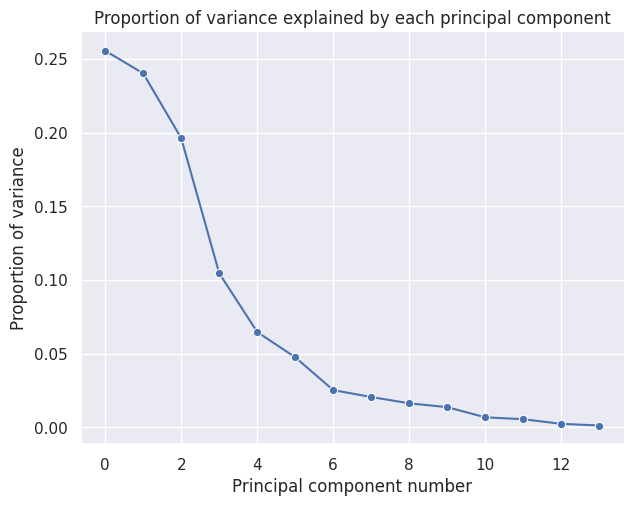

In [ ]:
# Get the variance explained by each principal component
explained_variance_array = pca.explained_variance_ratio_

explained_variance_array

####
pd.DataFrame(explained_variance_array, columns=["Variance explained"])


####
# Create a Pandas DataFrame from the variance explained array
explained_variance_array_df = pd.DataFrame(explained_variance_array, columns=["Variance explained"])

(
  # Create a line chart with sns.relplot
  sns.relplot(
      kind = 'line',
      data = explained_variance_array_df,
      x = explained_variance_array_df.index,
      y = "Variance explained",
      marker = 'o',
      aspect = 1.3)
  # Set the title of the plot
  .set(title = "Proportion of variance explained by each principal component")
  # Set the axis labels
  .set_axis_labels("Principal component number", "Proportion of variance")
);

In [ ]:
# Set the variable elbow to where you believe the elbow is
elbow = 4

# Create a PCA object with {elbow} principal components
# We add 1 as the principal components start at 0 and not 1
pca_elbow = PCA(n_components = elbow + 1)

# Fit the PCA object to the scaled features dataframe and transform it
pca_elbow_df = pca_elbow.fit_transform(Multiplesongs_minmax)

# The dataframe now contains the principal components of the scaled features dataframe
pca_elbow_df

,,pca0,pca1,pca2,pca3,pca4
name,artist,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,-0.106992,0.665159,0.743393,0.437211,0.001735
Saudade De Bahia,Antônio Carlos Jobim,-0.065764,-0.530715,0.512686,-0.228482,0.211348
"Canta Canta, Minha Gente",Martinho Da Vila,-0.179214,-0.584829,0.583182,-0.232051,0.300230
Mulher Eu Sei,Chico César,0.452502,-0.317315,0.937894,-0.001065,-0.021340
Rosa Morena,Kurt Elling,0.493803,-0.260796,0.882887,0.177489,-0.039377
...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,1.198025,0.109824,-0.053544,-0.092150,-0.422487
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.991934,0.067655,0.001892,0.190206,-0.579776
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,1.431440,0.324186,-0.147373,0.434143,-0.264123


##  Check number of clusters to use

If you have a dataset with roughly 5000 songs, that means that you should explore having between 20 and 100 clusters.

### Inertia

In [ ]:
# Data Frame already scaled "Multiplesongs_minmax"
# Decide on a random_state to use
seed = 123

# Set the maximum number of clusters to try
max_k = 100

# Create an empty list to store the inertia scores
inertia_list = []

# Iterate over the range of cluster numbers
for i in range(1, max_k + 1):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters = i,
                      n_init = "auto",
                      random_state = seed)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(pca_elbow_df)

    # Append the inertia score to the list
    inertia_list.append(myKMeans.inertia_)



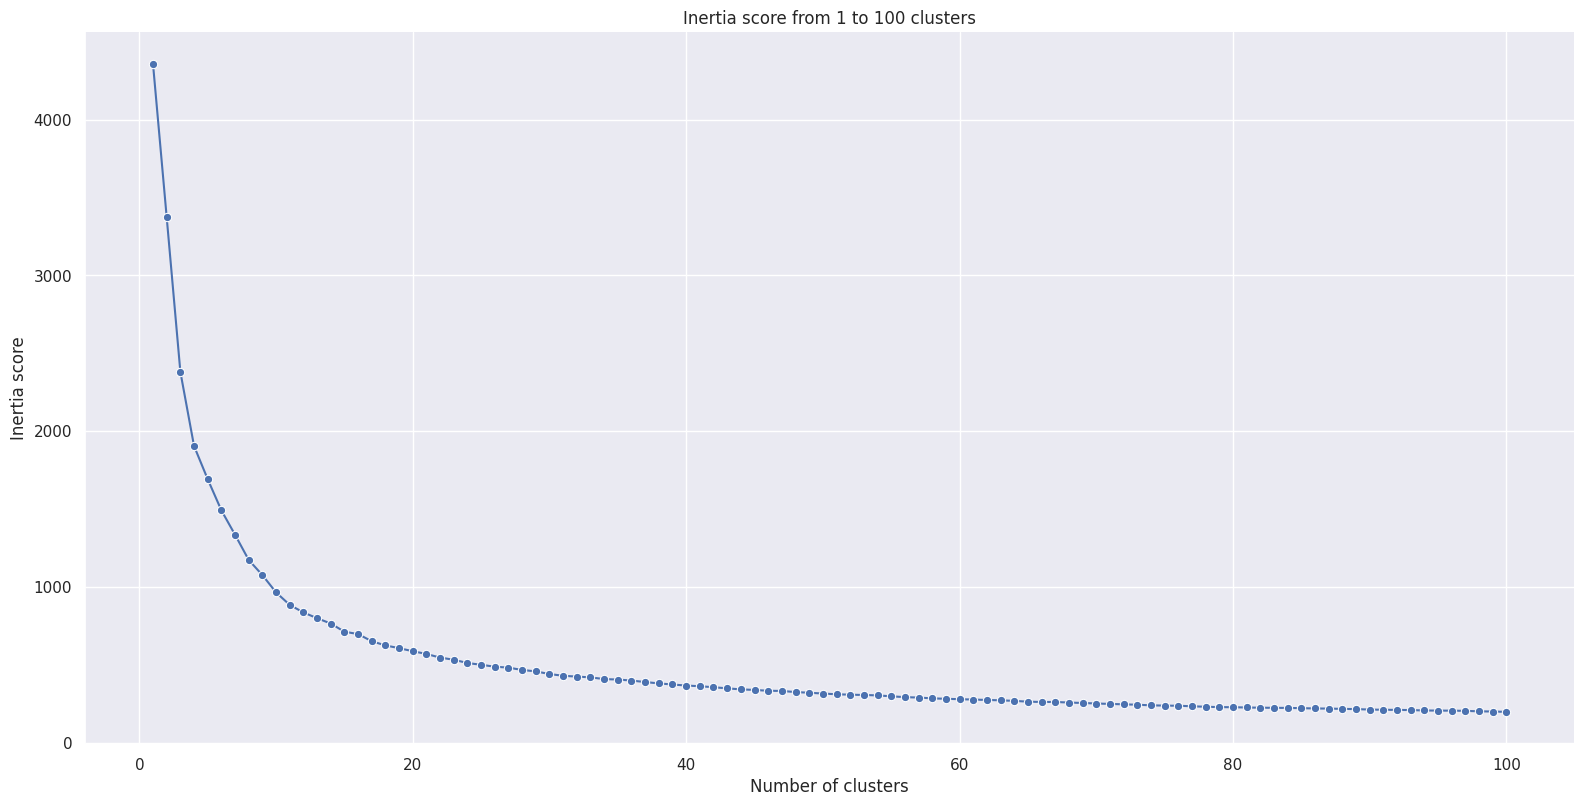

In [ ]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(1, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

### elbow method

In [ ]:
# Data Frame already scaled "Multiplesongs_minmax"
# Set the maximum number of clusters to try
max_k = 100

# Create an empty list to store the silhouette scores
sil_scores = []


for j in range(2, max_k):

    # Create a KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters = j,
                    n_init = "auto",
                    random_state = seed)

    # Fit the KMeans model to the scaled data
    kmeans.fit(Multiplesongs_minmax)

    # Get the cluster labels
    labels = kmeans.labels_

    # Calculate the silhouette score
    score = silhouette_score(Multiplesongs_minmax, labels)

    # Append the silhouette score to the list
    sil_scores.append(score)

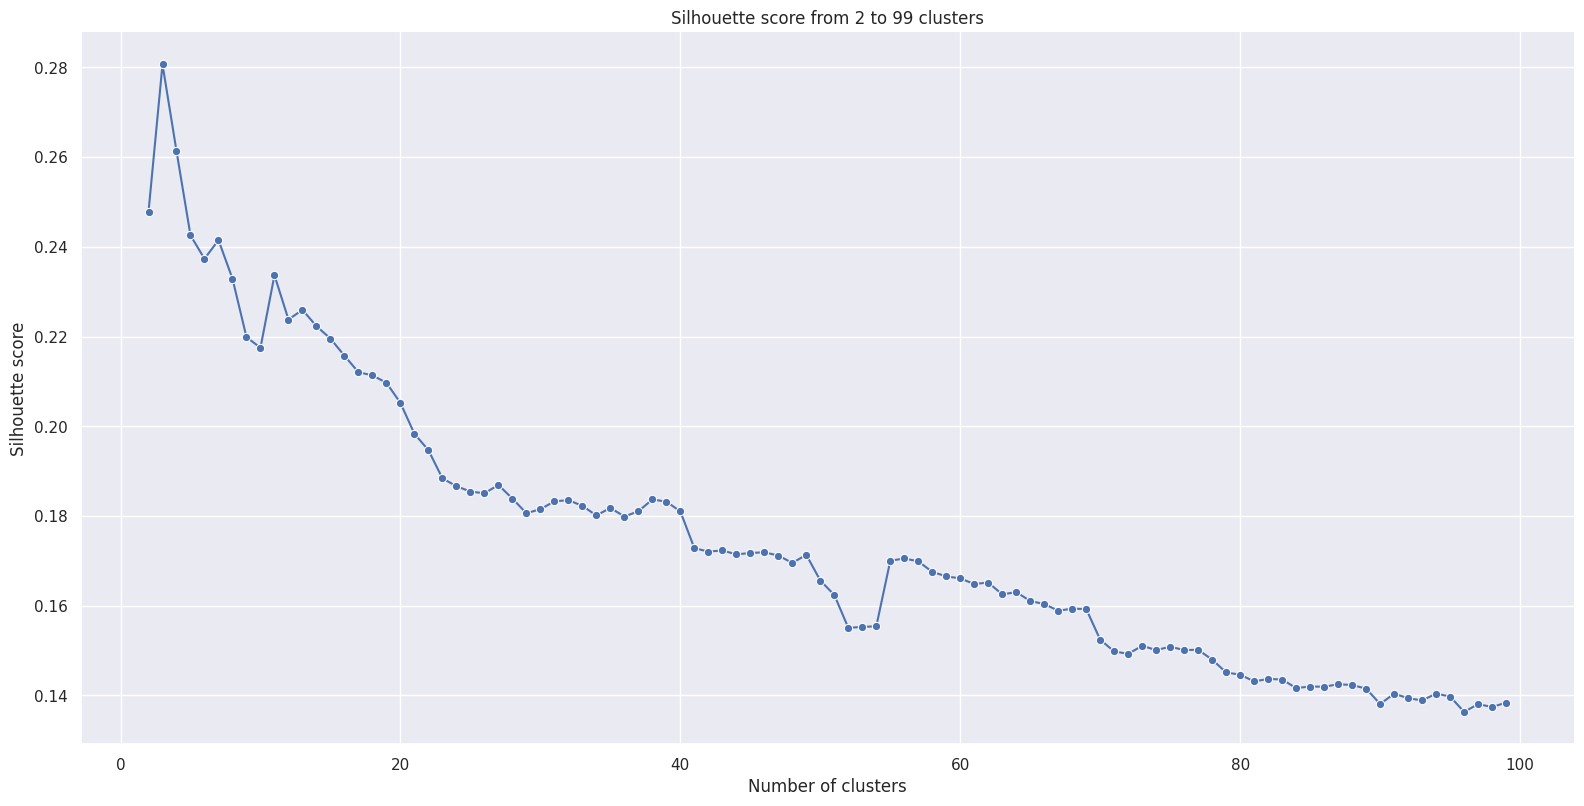

In [ ]:
(
sns.relplot(y = sil_scores,
            x = range(2, max_k),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
.set(title=f"Silhouette score from 2 to {max_k - 1} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

I determinate the number of clusters to 20

# KMeans model for Songs using MInMax Scalers and numbers of cluster to 40

In [ ]:
Multiplesongs_minmax

,,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.000000,0.680455,0.25900,1.000000,0.763897,0.0,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,0.059067,0.8
Saudade De Bahia,Antônio Carlos Jobim,0.000191,0.767322,0.39900,0.181818,0.771967,1.0,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,0.042058,0.8
"Canta Canta, Minha Gente",Martinho Da Vila,0.000382,0.880041,0.73000,0.181818,0.798018,1.0,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,0.031590,0.8
Mulher Eu Sei,Chico César,0.000573,0.729059,0.05020,0.363636,0.682811,1.0,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,0.040567,0.8
Rosa Morena,Kurt Elling,0.000764,0.673216,0.11900,0.545455,0.655228,1.0,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,0.063684,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.999236,0.208893,0.06940,0.272727,0.596818,1.0,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795,0.254357,0.8
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.999427,0.194416,0.10100,0.545455,0.621548,1.0,0.048148,0.858434,0.432487,0.070314,0.036041,0.388495,0.217350,0.8
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.999618,0.061634,0.00093,0.818182,0.277803,1.0,0.047277,0.954819,0.983756,0.078217,0.034924,0.334469,0.054302,0.6


In [ ]:
pca_elbow_df

,,pca0,pca1,pca2,pca3,pca4
name,artist,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,-0.106992,0.665159,0.743393,0.437211,0.001735
Saudade De Bahia,Antônio Carlos Jobim,-0.065764,-0.530715,0.512686,-0.228482,0.211348
"Canta Canta, Minha Gente",Martinho Da Vila,-0.179214,-0.584829,0.583182,-0.232051,0.300230
Mulher Eu Sei,Chico César,0.452502,-0.317315,0.937894,-0.001065,-0.021340
Rosa Morena,Kurt Elling,0.493803,-0.260796,0.882887,0.177489,-0.039377
...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,1.198025,0.109824,-0.053544,-0.092150,-0.422487
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.991934,0.067655,0.001892,0.190206,-0.579776
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,1.431440,0.324186,-0.147373,0.434143,-0.264123


In [ ]:
pca_elbow_df

,,pca0,pca1,pca2,pca3,pca4
name,artist,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,-0.106992,0.665159,0.743393,0.437211,0.001735
Saudade De Bahia,Antônio Carlos Jobim,-0.065764,-0.530715,0.512686,-0.228482,0.211348
"Canta Canta, Minha Gente",Martinho Da Vila,-0.179214,-0.584829,0.583182,-0.232051,0.300230
Mulher Eu Sei,Chico César,0.452502,-0.317315,0.937894,-0.001065,-0.021340
Rosa Morena,Kurt Elling,0.493803,-0.260796,0.882887,0.177489,-0.039377
...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,1.198025,0.109824,-0.053544,-0.092150,-0.422487
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.991934,0.067655,0.001892,0.190206,-0.579776
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,1.431440,0.324186,-0.147373,0.434143,-0.264123


In [ ]:
#########Import model for multiple using MInMax Scalers
# numbers of clusters 40
# Data Frame already scaled "Multiplesongs_minmax"
# 1. import the model
from sklearn.cluster import KMeans

# 2. Initialise the model
random_seed = 123

my_kmeans_music_MinMax = KMeans(n_clusters = 40, # we'll explore how to choose the number of clusters in a later notebook
                      random_state = random_seed)

# 3. fit the model to the data
my_kmeans_music_MinMax.fit(pca_elbow_df)

############################
# 4. Obtain the cluster output

clusters = my_kmeans_music_MinMax.labels_

# 5. Attach the cluster output to our original DataFrame
pca_elbow_df["cluster"] = clusters

pca_elbow_df.sort_values(by="cluster")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,,pca0,pca1,pca2,pca3,pca4,cluster
name,artist,,,,,,
Carro do Gás,Academia da Berlinda,0.160255,-0.467546,0.410800,-0.418376,0.440125,0
A Place In The Sun,Stevie Wonder,-0.010022,-0.514575,0.393796,-0.306876,0.074711,0
The Loco-Motion - Single Version,Little Eva,-0.078002,-0.521037,0.480726,-0.129859,0.174804,0
Like a Rolling Stone,Bob Dylan,0.194262,-0.458284,0.448014,-0.376908,-0.030380,0
He's a Doll,The Honeys,0.049259,-0.519417,0.462205,-0.302694,0.192510,0
...,...,...,...,...,...,...,...
Midnight City - Eric Prydz Private Remix,M83,-0.264693,0.733133,-0.389421,0.348259,0.351306,39
Testimony,Vader,0.050985,0.881486,-0.577763,0.361996,0.177475,39
Dark Age,Vader,-0.179271,0.712545,-0.448817,0.108702,0.021217,39


In [ ]:
pca_elbow_df

,,pca0,pca1,pca2,pca3,pca4,cluster
name,artist,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,-0.106992,0.665159,0.743393,0.437211,0.001735,4
Saudade De Bahia,Antônio Carlos Jobim,-0.065764,-0.530715,0.512686,-0.228482,0.211348,0
"Canta Canta, Minha Gente",Martinho Da Vila,-0.179214,-0.584829,0.583182,-0.232051,0.300230,35
Mulher Eu Sei,Chico César,0.452502,-0.317315,0.937894,-0.001065,-0.021340,9
Rosa Morena,Kurt Elling,0.493803,-0.260796,0.882887,0.177489,-0.039377,20
...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,1.198025,0.109824,-0.053544,-0.092150,-0.422487,21
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.991934,0.067655,0.001892,0.190206,-0.579776,32
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,1.431440,0.324186,-0.147373,0.434143,-0.264123,32


In [ ]:
pca_elbow_df1=pca_elbow_df.set_index('cluster')
pca_elbow_df1

,pca0,pca1,pca2,pca3,pca4
cluster,,,,,
4,-0.106992,0.665159,0.743393,0.437211,0.001735
0,-0.065764,-0.530715,0.512686,-0.228482,0.211348
35,-0.179214,-0.584829,0.583182,-0.232051,0.300230
9,0.452502,-0.317315,0.937894,-0.001065,-0.021340
20,0.493803,-0.260796,0.882887,0.177489,-0.039377
...,...,...,...,...,...
21,1.198025,0.109824,-0.053544,-0.092150,-0.422487
32,0.991934,0.067655,0.001892,0.190206,-0.579776
32,1.431440,0.324186,-0.147373,0.434143,-0.264123


In [ ]:
pca_elbow_df2=pca_elbow_df.groupby('cluster').mean()
pca_elbow_df2

,pca0,pca1,pca2,pca3,pca4
cluster,,,,,
0,0.071509,-0.479443,0.437884,-0.281650,0.060844
1,-0.592624,0.330907,0.272603,-0.503421,0.072810
2,0.077850,-0.271590,-0.157528,0.310729,-0.489934
3,0.323845,-0.136782,-0.780669,0.113230,0.191754
4,-0.181767,0.603075,0.657502,0.236426,0.081491
5,1.134057,0.122060,0.222742,0.285945,0.165666
6,-0.241088,-0.405496,-0.220605,0.269500,-0.211003
7,-0.053437,0.708896,-0.631847,-0.318965,0.171511
8,0.755337,1.056709,0.227559,0.210180,0.076839


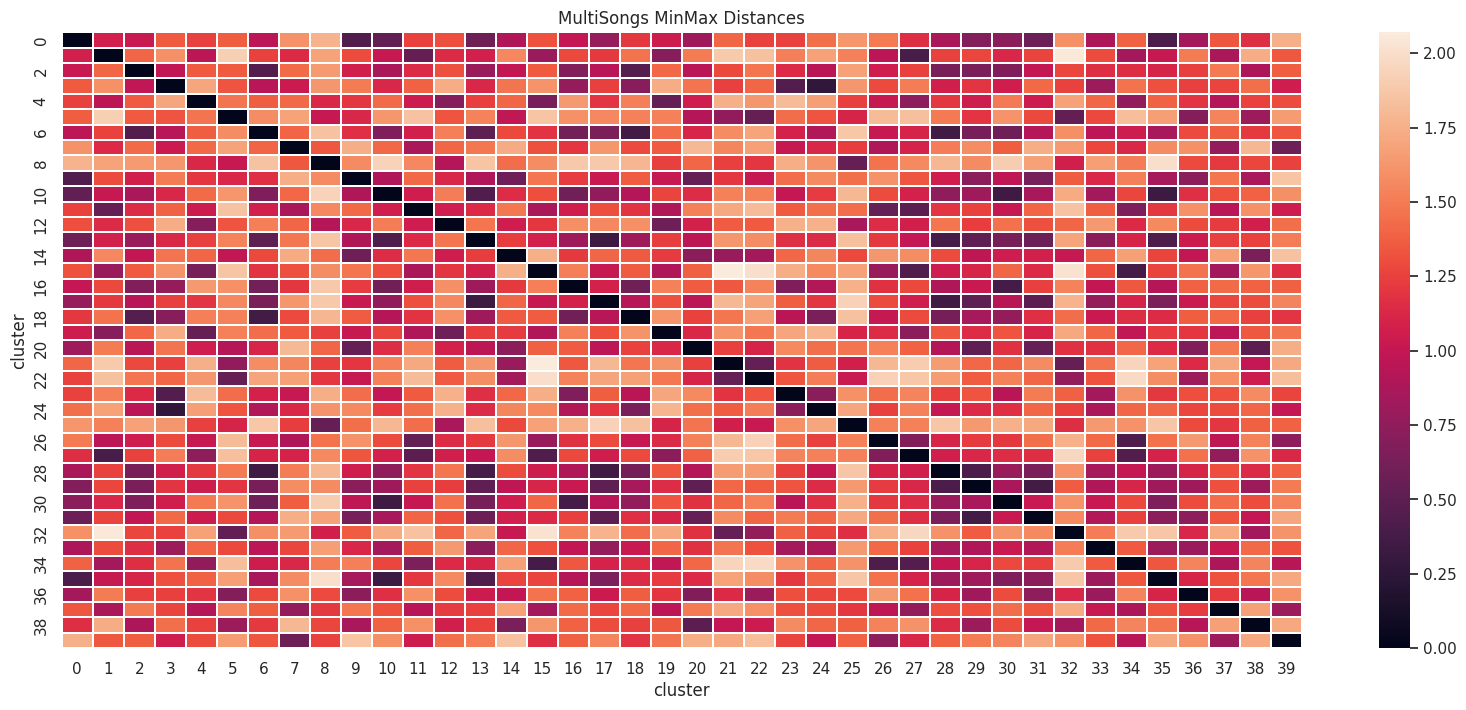

In [ ]:
# Compute the pairwise distance matrices
minmax_distances = pd.DataFrame(pairwise_distances(pca_elbow_df2),
                                index=pca_elbow_df2.index,
                                columns=pca_elbow_df2.index)

# Stating that we want two plots
fig, (ax1) = plt.subplots(1, figsize=(20, 8))

# Plotting the two plots
sns.heatmap(minmax_distances, ax=ax1, linewidths=.2)

# Adding titles to the plots
ax1.set_title('MultiSongs MinMax Distances')


plt.show()

In [ ]:
pca_elbow_df

,,pca0,pca1,pca2,pca3,pca4,cluster
name,artist,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,-0.106992,0.665159,0.743393,0.437211,0.001735,4
Saudade De Bahia,Antônio Carlos Jobim,-0.065764,-0.530715,0.512686,-0.228482,0.211348,0
"Canta Canta, Minha Gente",Martinho Da Vila,-0.179214,-0.584829,0.583182,-0.232051,0.300230,35
Mulher Eu Sei,Chico César,0.452502,-0.317315,0.937894,-0.001065,-0.021340,9
Rosa Morena,Kurt Elling,0.493803,-0.260796,0.882887,0.177489,-0.039377,20
...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,1.198025,0.109824,-0.053544,-0.092150,-0.422487,21
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.991934,0.067655,0.001892,0.190206,-0.579776,32
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,1.431440,0.324186,-0.147373,0.434143,-0.264123,32


In [ ]:
pca_elbow_df3=pca_elbow_df.reset_index()
pca_elbow_df3

,name,artist,pca0,pca1,pca2,pca3,pca4,cluster
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,-0.106992,0.665159,0.743393,0.437211,0.001735,4
1,Saudade De Bahia ...,Antônio Carlos Jobim,-0.065764,-0.530715,0.512686,-0.228482,0.211348,0
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,-0.179214,-0.584829,0.583182,-0.232051,0.300230,35
3,Mulher Eu Sei ...,Chico César,0.452502,-0.317315,0.937894,-0.001065,-0.021340,9
4,Rosa Morena ...,Kurt Elling,0.493803,-0.260796,0.882887,0.177489,-0.039377,20
...,...,...,...,...,...,...,...,...
5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,1.198025,0.109824,-0.053544,-0.092150,-0.422487,21
5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.991934,0.067655,0.001892,0.190206,-0.579776,32
5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,1.431440,0.324186,-0.147373,0.434143,-0.264123,32
5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,1.119281,0.081773,0.022625,0.012309,-0.561251,21


merge them

In [ ]:
Multiplesongs_minmax=Multiplesongs_minmax.reset_index()
Multiplesongs_minmax

,index,name,artist,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.000000,0.680455,0.25900,1.000000,0.763897,0.0,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,0.059067,0.8
1,1,Saudade De Bahia ...,Antônio Carlos Jobim,0.000191,0.767322,0.39900,0.181818,0.771967,1.0,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,0.042058,0.8
2,2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.000382,0.880041,0.73000,0.181818,0.798018,1.0,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,0.031590,0.8
3,3,Mulher Eu Sei ...,Chico César,0.000573,0.729059,0.05020,0.363636,0.682811,1.0,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,0.040567,0.8
4,4,Rosa Morena ...,Kurt Elling,0.000764,0.673216,0.11900,0.545455,0.655228,1.0,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,0.063684,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.999236,0.208893,0.06940,0.272727,0.596818,1.0,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795,0.254357,0.8
5231,5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.999427,0.194416,0.10100,0.545455,0.621548,1.0,0.048148,0.858434,0.432487,0.070314,0.036041,0.388495,0.217350,0.8
5232,5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.999618,0.061634,0.00093,0.818182,0.277803,1.0,0.047277,0.954819,0.983756,0.078217,0.034924,0.334469,0.054302,0.6
5233,5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.999809,0.137539,0.02080,0.363636,0.498142,1.0,0.045643,0.886546,0.512690,0.112462,0.060000,0.313608,0.074424,0.8


In [ ]:
merged_df3 = pd.merge(pca_elbow_df3, Multiplesongs_minmax, on='name')
merged_df3

,name,artist_x,pca0,pca1,pca2,pca3,pca4,cluster,index,artist_y,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,-0.106992,0.665159,0.743393,0.437211,0.001735,4,0,Gilberto Gil,...,0.763897,0.0,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,0.059067,0.8
1,Saudade De Bahia ...,Antônio Carlos Jobim,-0.065764,-0.530715,0.512686,-0.228482,0.211348,0,1,Antônio Carlos Jobim,...,0.771967,1.0,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,0.042058,0.8
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,-0.179214,-0.584829,0.583182,-0.232051,0.300230,35,2,Martinho Da Vila,...,0.798018,1.0,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,0.031590,0.8
3,"Canta Canta, Minha Gente ...",Martinho Da Vila,-0.179214,-0.584829,0.583182,-0.232051,0.300230,35,169,Martinho Da Vila,...,0.784210,1.0,0.375817,0.328313,0.000000,0.192503,0.841624,0.441553,0.031900,0.8
4,"Canta Canta, Minha Gente ...",Martinho Da Vila,-0.206243,-0.582784,0.423096,-0.233952,0.272416,35,2,Martinho Da Vila,...,0.798018,1.0,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,0.031590,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5720,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,1.198025,0.109824,-0.053544,-0.092150,-0.422487,21,5230,Pyotr Ilyich Tchaikovsky,...,0.596818,1.0,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795,0.254357,0.8
5721,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.991934,0.067655,0.001892,0.190206,-0.579776,32,5231,Tristan Murail,...,0.621548,1.0,0.048148,0.858434,0.432487,0.070314,0.036041,0.388495,0.217350,0.8
5722,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,1.431440,0.324186,-0.147373,0.434143,-0.264123,32,5232,Arnold Schoenberg,...,0.277803,1.0,0.047277,0.954819,0.983756,0.078217,0.034924,0.334469,0.054302,0.6
5723,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,1.119281,0.081773,0.022625,0.012309,-0.561251,21,5233,Antonín Dvořák,...,0.498142,1.0,0.045643,0.886546,0.512690,0.112462,0.060000,0.313608,0.074424,0.8


In [ ]:
song_clustered_means=merged_df3.groupby("cluster" ).agg({"loudness":'mean', "speechiness":'mean',"acousticness":'mean', "instrumentalness":'mean',
                                                                  "liveness":'mean', "valence":'mean', "danceability":'mean',"energy":'mean' })
song_clustered_means

,loudness,speechiness,acousticness,instrumentalness,liveness,valence,danceability,energy
cluster,,,,,,,,
0,0.827716,0.066530,0.510299,0.043421,0.171210,0.674367,0.622351,0.568825
1,0.881894,0.098565,0.149840,0.017505,0.176520,0.675910,0.706429,0.717468
2,0.864945,0.059395,0.297009,0.016836,0.211719,0.321281,0.498997,0.575970
3,0.843484,0.117095,0.004255,0.821089,0.206850,0.212227,0.268742,0.906896
4,0.799389,0.079311,0.644704,0.058272,0.209723,0.590063,0.644754,0.443638
5,0.661726,0.052596,0.909078,0.777836,0.135527,0.206612,0.394455,0.174222
6,0.894591,0.098227,0.057869,0.015411,0.237069,0.495784,0.644789,0.820704
7,0.846212,0.104642,0.018603,0.800295,0.220110,0.223352,0.322302,0.892026
8,0.625624,0.049859,0.897449,0.856417,0.132570,0.179298,0.332927,0.151876


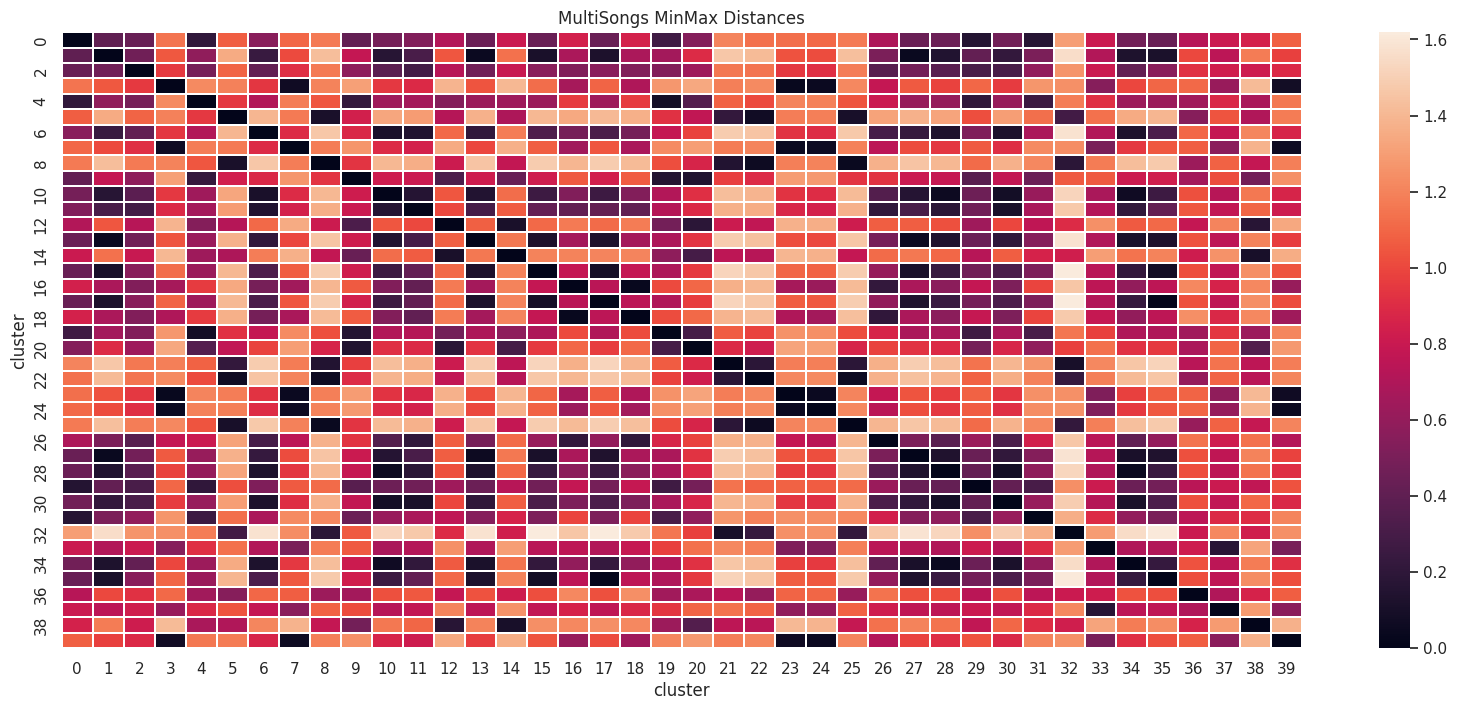

In [ ]:
# Compute the pairwise distance matrices
minmax_distances = pd.DataFrame(pairwise_distances(song_clustered_means),
                                index=song_clustered_means.index,
                                columns=song_clustered_means.index)

# Stating that we want two plots
fig, (ax1) = plt.subplots(1, figsize=(20, 8))

# Plotting the two plots
sns.heatmap(minmax_distances, ax=ax1, linewidths=.2)

# Adding titles to the plots
ax1.set_title('MultiSongs MinMax Distances')


plt.show()

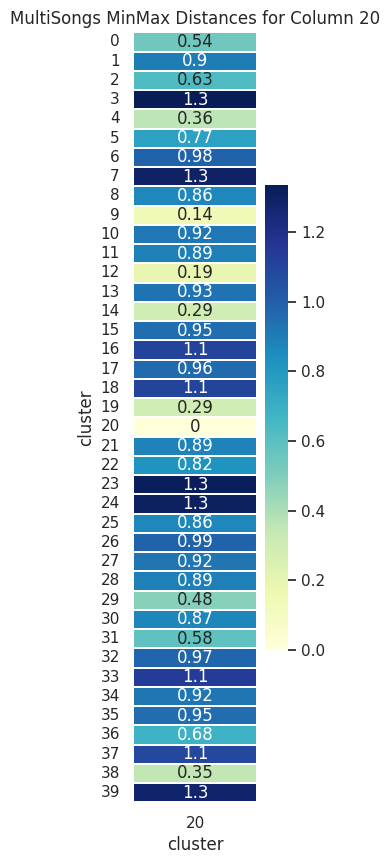

In [ ]:
# Isolate column 20
column_20 = minmax_distances[[20]]

# Set up the figure and axes with a larger size
fig, ax = plt.subplots(figsize=(2,10))  # Adjust the figsize as needed

# Plotting the heatmap for column 20
sns.heatmap(column_20, ax=ax, linewidths=.2, cmap='YlGnBu', annot=True)

# Adding titles to the plot
ax.set_title('MultiSongs MinMax Distances for Column 20')

plt.show()


In [ ]:
chatplot=song_clustered_means
chatplot1=chatplot.reset_index()
chatplot1

,cluster,loudness,speechiness,acousticness,instrumentalness,liveness,valence,danceability,energy
0,0,0.827716,0.066530,0.510299,0.043421,0.171210,0.674367,0.622351,0.568825
1,1,0.881894,0.098565,0.149840,0.017505,0.176520,0.675910,0.706429,0.717468
2,2,0.864945,0.059395,0.297009,0.016836,0.211719,0.321281,0.498997,0.575970
3,3,0.843484,0.117095,0.004255,0.821089,0.206850,0.212227,0.268742,0.906896
4,4,0.799389,0.079311,0.644704,0.058272,0.209723,0.590063,0.644754,0.443638
5,5,0.661726,0.052596,0.909078,0.777836,0.135527,0.206612,0.394455,0.174222
6,6,0.894591,0.098227,0.057869,0.015411,0.237069,0.495784,0.644789,0.820704
7,7,0.846212,0.104642,0.018603,0.800295,0.220110,0.223352,0.322302,0.892026
8,8,0.625624,0.049859,0.897449,0.856417,0.132570,0.179298,0.332927,0.151876
9,9,0.777273,0.053987,0.767382,0.047493,0.176134,0.481310,0.581148,0.315737


In [ ]:
# Define the clusters to plot
clusters_to_plot = [20, 7]

# Define the categories
categories = chatplot1.columns[1:]

# Create a list to store the Scatterpolar objects
scatter_objects = []

# Iterate over the specified clusters and add an object for each cluster to the list
for cluster in clusters_to_plot:
    # Find the mean value for each column of the cluster
    cluster_data = chatplot1[chatplot1["cluster"] == cluster]
    cluster_means = [cluster_data[col].values[0] for col in categories]

    # Create a Scatterpolar object for the cluster
    cluster_scatter = go.Scatterpolar(
        r = cluster_means, # set the radial coordinates
        theta = categories, # the names of the columns
        fill = 'toself', # fills in the space with colour
        name = f'Cluster {cluster}' # adds the name of the cluster
    )

    # Add the Scatterpolar object to the list
    scatter_objects.append(cluster_scatter)

# Create the figure (the white area)
fig = go.Figure()

# Add the scatter objects to the figure
fig.add_traces(scatter_objects)

# Add extras to the plot, such as title
fig.update_layout(
  title_text = 'Radar chart of music clusters',
  height = 600,
  width = 800,
  polar = dict(
    radialaxis = dict(
      visible = True, # visibility of the numbers on the arm
      range = [0, 1] # scale of the plot
    )),
  showlegend = True
)

# Show the plot
fig.show()


In [ ]:
sns.heatmap(song_clustered_means, annot=True, fmt=".2f", cmap="Viridis", ax=ax2)


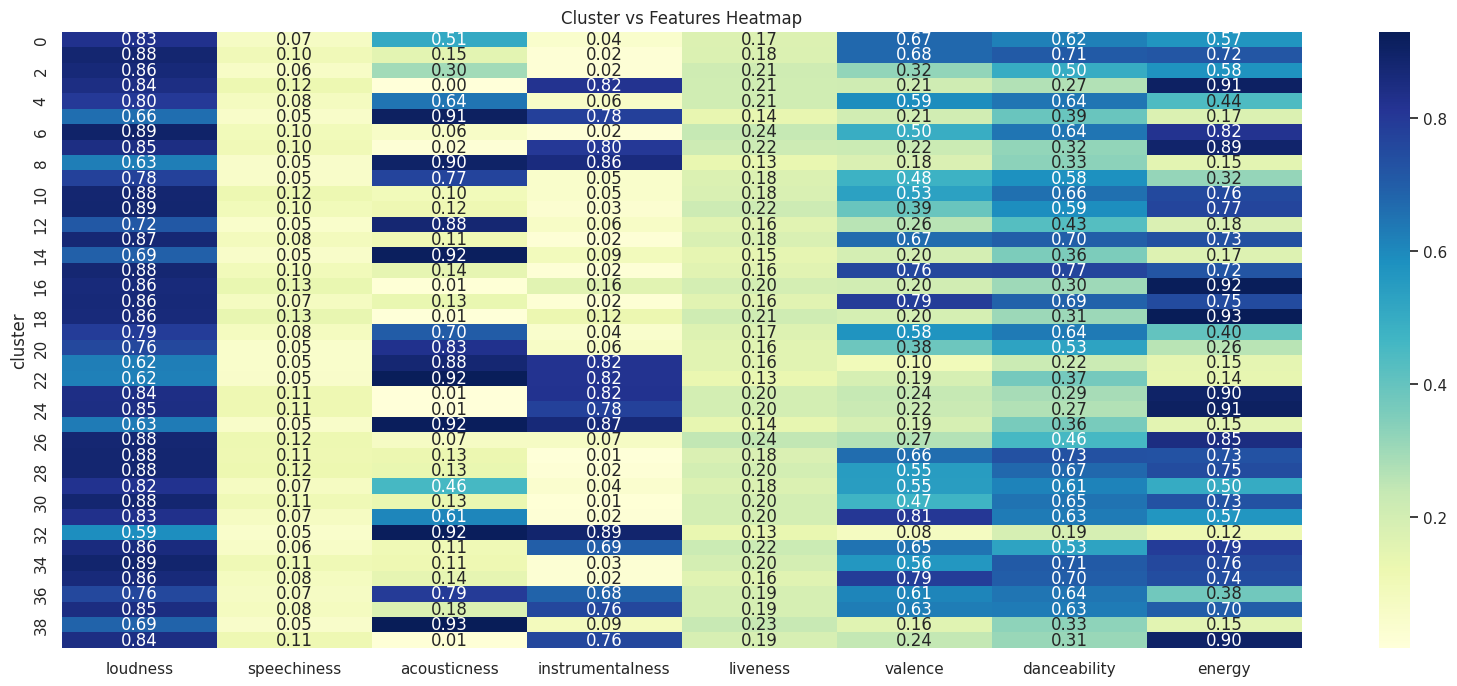

In [ ]:
# Plotting Cluster vs Features Heatmap
fig, ax2 = plt.subplots(figsize=(20, 8))
sns.heatmap(song_clustered_means, annot=True, fmt=".2f", cmap="YlGnBu", ax=ax2)

# Adding title to the plot
ax2.set_title('Cluster vs Features Heatmap')

plt.show()



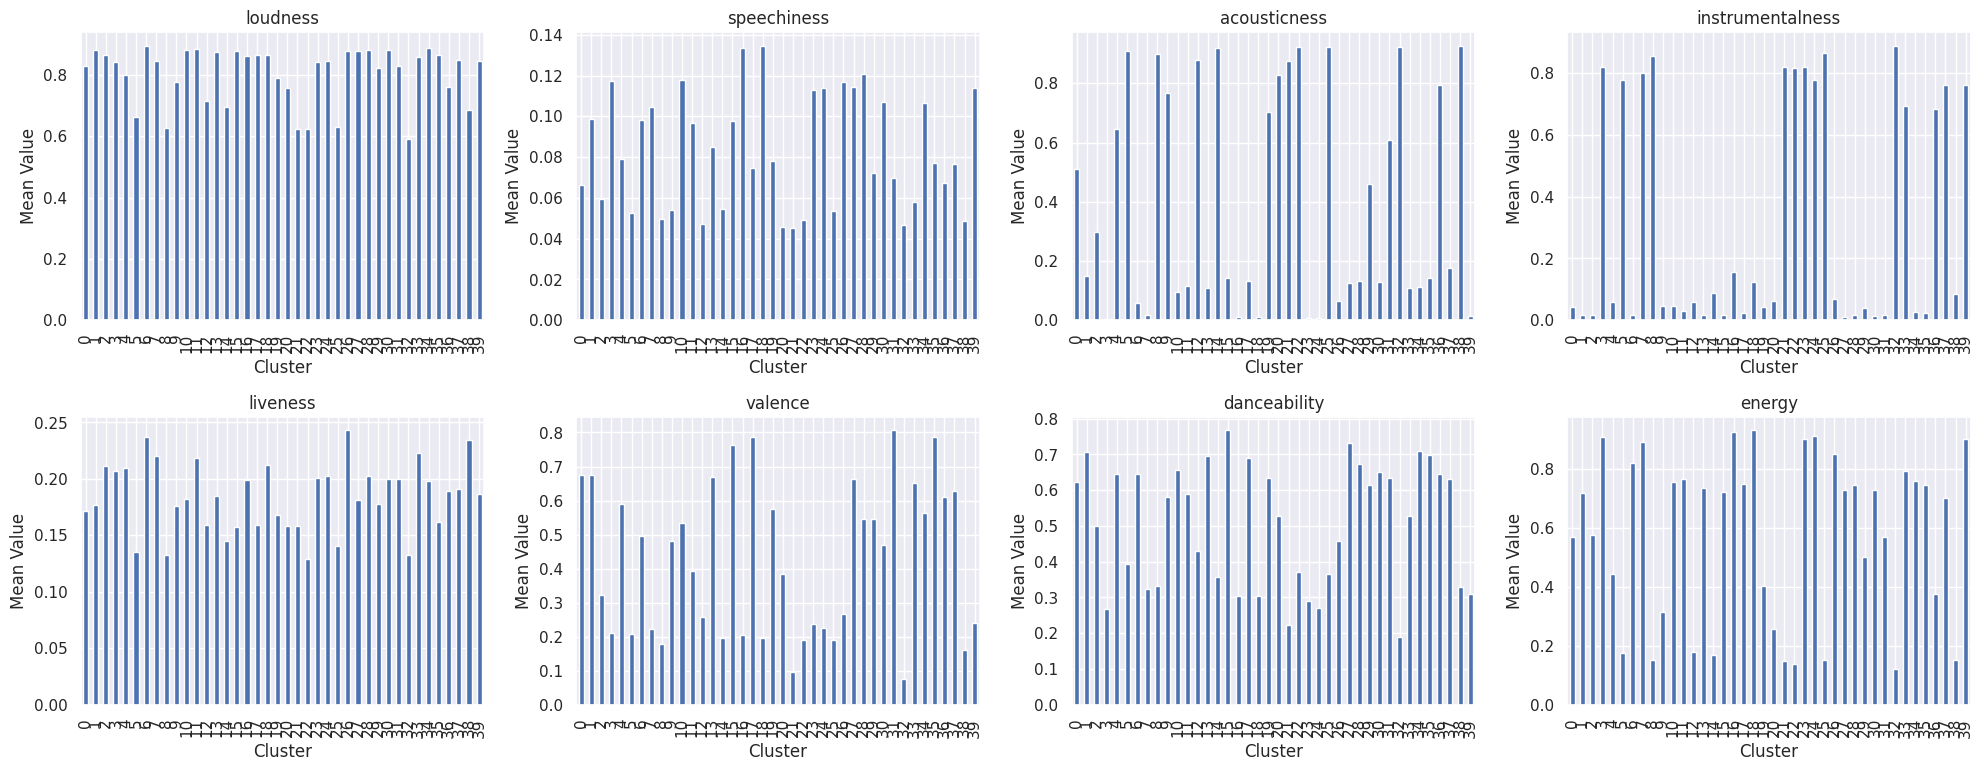

In [ ]:
import matplotlib.pyplot as plt

features = song_clustered_means.columns
clusters = song_clustered_means.index

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    song_clustered_means[feature].plot(kind='bar', ax=ax)
    ax.set_title(feature)
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Mean Value')

# Remove empty subplots if there are any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



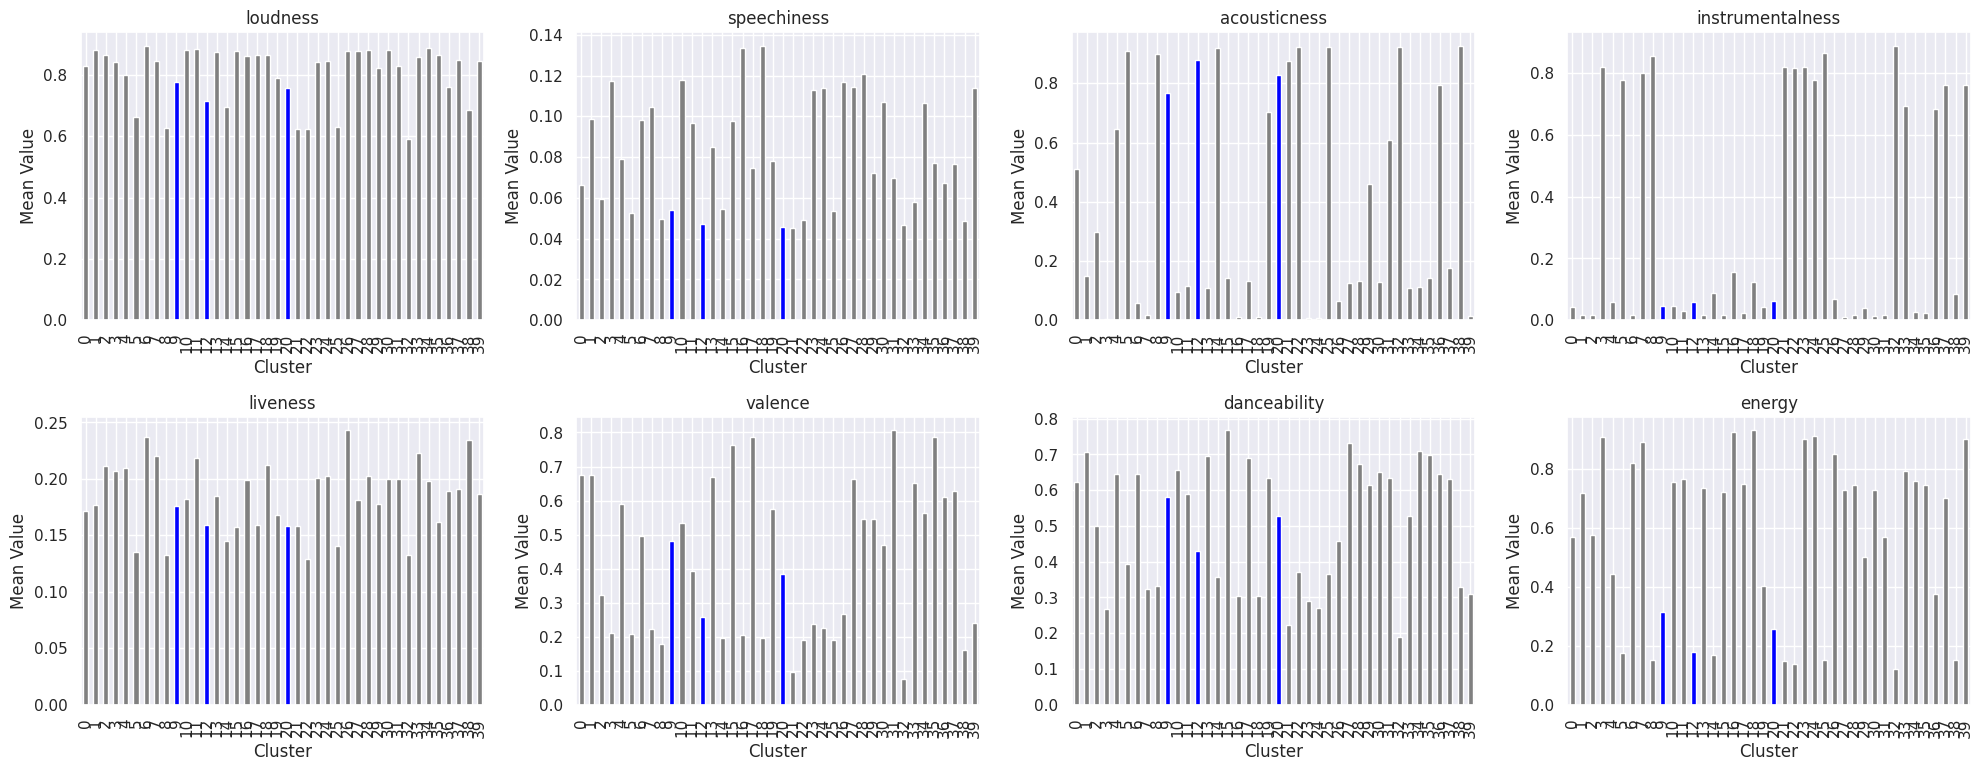

In [ ]:
import matplotlib.pyplot as plt

features = song_clustered_means.columns
clusters = song_clustered_means.index

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
axes = axes.flatten()

# Specify the columns to color
columns_to_color = [9, 12, 20]

for i, feature in enumerate(features):
    ax = axes[i]
    # Determine the colors for the bars
    colors = ['blue' if j in columns_to_color else 'gray' for j in range(len(clusters))]
    song_clustered_means[feature].plot(kind='bar', ax=ax, color=colors)
    ax.set_title(feature)
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Mean Value')

# Remove empty subplots if there are any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


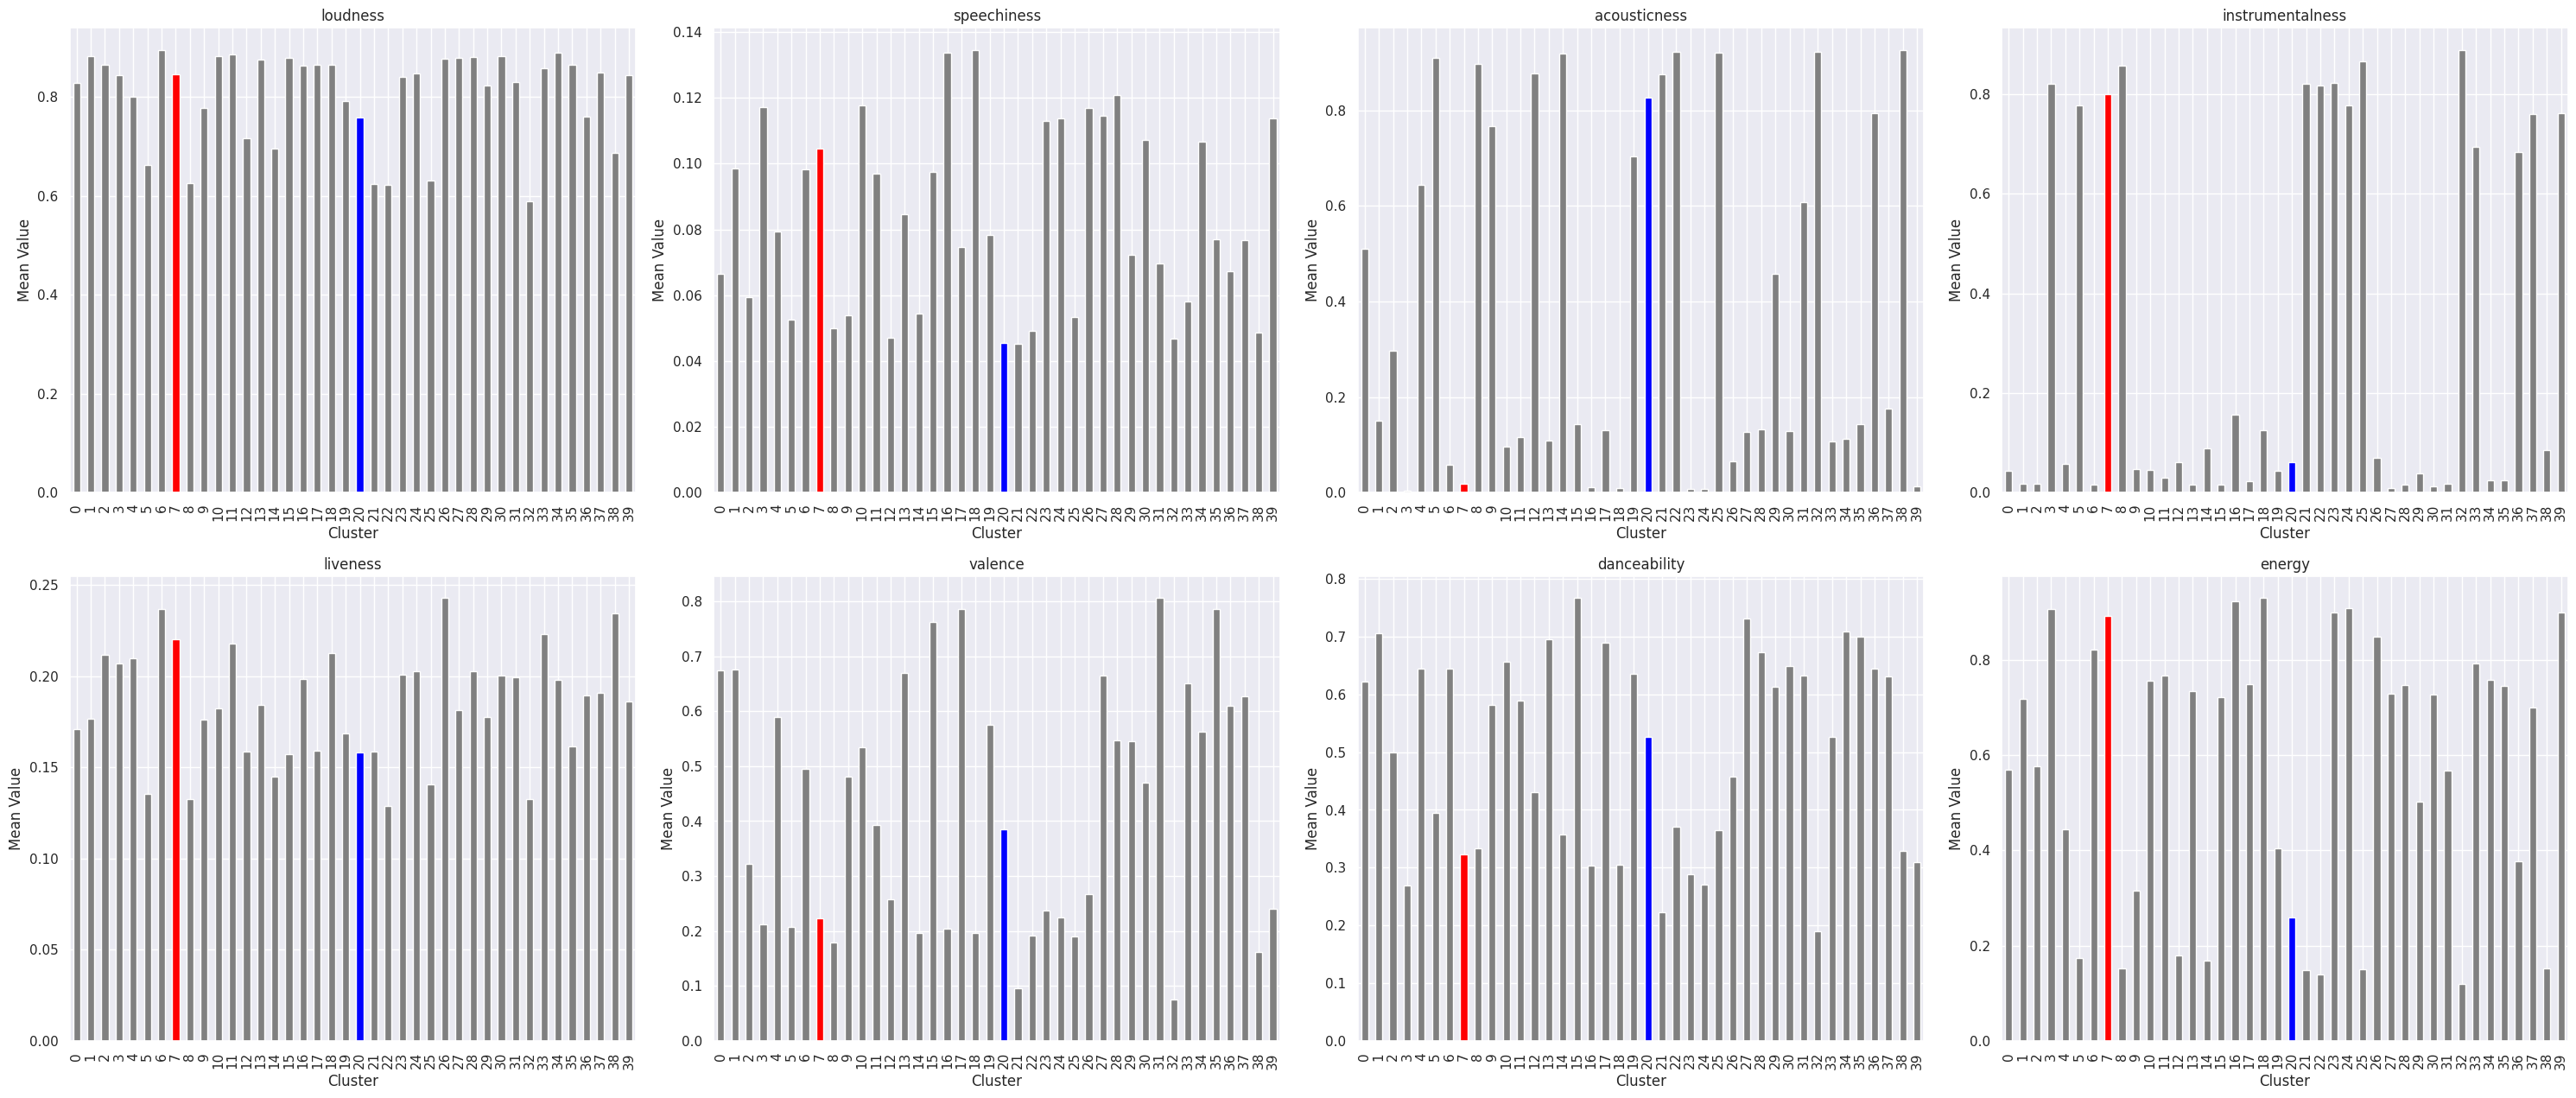

In [ ]:
import matplotlib.pyplot as plt

features = song_clustered_means.columns
clusters = song_clustered_means.index

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(30, 25))
axes = axes.flatten()

# Specify the columns to color
columns_to_color_blue = [ 20]
columns_to_color_red = [7]

for i, feature in enumerate(features):
    ax = axes[i]
    # Determine the colors for the bars
    colors = ['blue' if j in columns_to_color_blue else
              'red' if j in columns_to_color_black else 'gray'
              for j in range(len(clusters))]
    song_clustered_means[feature].plot(kind='bar', ax=ax, color=colors)
    ax.set_title(feature)
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Mean Value')

# Remove empty subplots if there are any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
merged_df3.columns

Index(['name', 'artist_x', 'pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'cluster',
       'artist_y', 'Unnamed: 0', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [ ]:
merged_df3_grouped= merged_df3.groupby(["cluster", 'name', 'artist_x']).agg({"loudness":'mean', "speechiness":'mean',"acousticness":'mean', "instrumentalness":'mean',
                                                                  "liveness":'mean', "valence":'mean', "danceability":'mean',"energy":'mean' })

merged_df3_grouped

loudness  \
cluster name                                               artist_x                                                     
0       (Everything I Do) I Do It For You              ... Bryan Adams                                       0.772179   
        A Place In The Sun                             ... Stevie Wonder                                     0.792459   
        A Whiter Shade Of Pale                         ... Procol Harum                                      0.865557   
        Addicted To Love                               ... Robert Palmer                                     0.759431   
        All In One                                     ... Bob Marley & The Wailers                          0.831192   
...                                                                                                               ...   
39      When the Moment of Death Arrives               ... Sentenced                                         0.813358   
        Wings                                          ... Vader                                             0.870994   
        Wolverine Blues                                ... Entombed                                          0.899579   
        World Eater                                    ... Bolt Thrower                                      0.868654   
        Years of Decay                                 ... Convulse                                          0.854015   

                                                                                                             speechiness  \
cluster name                                               artist_x                                                        
0       (Everything I Do) I Do It For You              ... Bryan Adams                                          0.030719   
        A Place In The Sun                             ... Stevie Wonder                                        0.059259   
        A Whiter Shade Of Pale                         ... Procol Harum                                         0.037255   
        Addicted To Love                               ... Robert Palmer                                        0.033769   
        All In One                                     ... Bob Marley & The Wailers                             0.138344   
...                                                                                                                  ...   
39      When the Moment of Death Arrives               ... Sentenced                                            0.151416   
        Wings                                          ... Vader                                                0.159041   
        Wolverine Blues                                ... Entombed                                             0.077996   
        World Eater                                    ... Bolt Thrower                                         0.208061   
        Years of Decay                                 ... Convulse                                             0.181917   

                                                                                                             acousticness  \
cluster name                                               artist_x                                                         
0       (Everything I Do) I Do It For You              ... Bryan Adams                                           0.080823   
        A Place In The Sun                             ... Stevie Wonder                                         0.280120   
        A Whiter Shade Of Pale                         ... Procol Harum                                          0.506024   
        Addicted To Love                               ... Robert Palmer                                         0.383534   
        All In One                                     ... Bob Marley & The Wailers                              0.349398   
...                                            

In [ ]:
merged_df3_groupeddefini=merged_df3_grouped.reset_index()
merged_df3_groupeddefini
cluster_2_df = merged_df3_groupeddefini[merged_df3_groupeddefini['cluster'] == 12
                                        ]
cluster_2_df

,cluster,name,artist_x,loudness,speechiness,acousticness,instrumentalness,liveness,valence,danceability,energy
1665,12,"'Round Midnight (feat. John Coltrane, Red Garl...",Miles Davis,0.796909,0.048257,0.793173,0.000365,0.130699,0.213198,0.510858,0.182000
1666,12,"A Love Supreme, Pt. IV - Psalm ...",John Coltrane,0.784911,0.033987,0.900602,0.043858,0.136778,0.381726,0.394002,0.313000
1667,12,"Alabama - Live At Birdland Jazzclub, New York ...",John Coltrane,0.694271,0.044989,0.777108,0.049442,0.124620,0.113706,0.442606,0.076800
1668,12,All of Me ...,Billie Holiday,0.750552,0.043028,0.965194,0.321490,0.143195,0.293063,0.491899,0.135300
1669,12,Amorfoda ...,Bad Bunny,0.848929,0.063943,0.988956,0.000128,0.084296,0.311675,0.774560,0.418000
...,...,...,...,...,...,...,...,...,...,...,...
1721,12,"Werther: ""Pourquoi me réveiller, ô souffle du ...",Jules Massenet,0.724398,0.047495,0.966867,0.141117,0.199595,0.079898,0.135471,0.143000
1722,12,You Don't Know What Love Is ...,Billie Holiday,0.730261,0.043210,0.917336,0.000039,0.192705,0.179763,0.397794,0.129933
1723,12,You Don't Know What Love Is ...,Dinah Washington,0.730261,0.043210,0.917336,0.000039,0.192705,0.179763,0.397794,0.129933
1724,12,You Go To My Head - 2020 Mix ...,Frank Sinatra,0.740211,0.037691,0.968876,0.000942,0.186424,0.103553,0.152017,0.215000


In [ ]:
merged_df3_groupeddefini=merged_df3_grouped.reset_index()
merged_df3_groupeddefini
cluster_2_df = merged_df3_groupeddefini[merged_df3_groupeddefini['cluster'] == 20
                                        ]
cluster_2_df


,cluster,name,artist_x,loudness,speechiness,acousticness,instrumentalness,liveness,valence,danceability,energy
2678,20,All of Me ...,John Legend,0.750552,0.043028,0.965194,0.321490,0.143195,0.293063,0.491899,0.1353
2679,20,Always On My Mind ...,Elvis Presley,0.744319,0.035294,0.748996,0.012284,0.120567,0.502538,0.370217,0.3870
2680,20,Assist ...,Vic Chesnutt,0.720746,0.037146,0.856426,0.000038,0.122594,0.207107,0.492244,0.1240
2681,20,At Last - Single Version ...,Etta James,0.815412,0.035294,0.723896,0.000609,0.320162,0.326904,0.173733,0.3260
2682,20,Blue Moon ...,Billie Holiday,0.791709,0.076035,0.985944,0.121827,0.142857,0.547208,0.660807,0.2690
...,...,...,...,...,...,...,...,...,...,...,...
2761,20,Wild Horses - 2009 Mix ...,The Rolling Stones,0.871882,0.027778,0.689759,0.010863,0.079838,0.160406,0.446743,0.3890
2762,20,Wonderful Tonight ...,Eric Clapton,0.723403,0.031917,0.651606,0.130964,0.126646,0.492386,0.591520,0.2140
2763,20,You Are The Sunshine Of My Life ...,Stevie Wonder,0.741254,0.074946,0.826305,0.000061,0.246201,0.685279,0.536711,0.4600
2764,20,You Belong To Me ...,Jo Stafford,0.740325,0.034314,0.948795,0.000000,0.113475,0.169543,0.383661,0.1450


cluster 0 = happy mood pop // cluster 1=  electronic, drum and bass, and extreme metal influences.// cluster 2= K-pop, Latin urban, EDM, and extreme metal influences.// cluster 3= mix of jazz, classic rock, soul, folk, Brazilian music, and classic pop// cluster 4=classic pop, Latin urban, electronic dance music (EDM), and K-pop influence// cluster 5= Ballads//cluster 6=Latin urban, K-pop, German pop/rock, metal, and EDM influences.//cluster 7=pop/rap, Latin urban, hip-hop, EDM, and reggaeton influences. //cluster 8=classic rock, pop, Latin pop, reggae, and dance-pop influences//cluster 9=classic mussic//cluster 10: Relaxing Music Brazilian music, classic rock, pop, jazz, fado, and pop ballad influences. // cluster 11: metal, classic rock 'n' roll, indie rock, and instrumental influences. //cluster 12:melodic death metal, death metal, EDM, classic rock, and psychedelic rock influences//cluster 13:classical crossover, contemporary classical, and instrumental genres.

In [ ]:
song_clustered_means=merged_df3.groupby("cluster" ).agg({"loudness":'mean', "speechiness":'mean',"acousticness":'mean', "instrumentalness":'mean',
                                                                  "liveness":'mean', "valence":'mean', "danceability":'mean',"energy":'mean' })
song_clustered_means

,loudness,speechiness,acousticness,instrumentalness,liveness,valence,danceability,energy
cluster,,,,,,,,
0,0.827716,0.066530,0.510299,0.043421,0.171210,0.674367,0.622351,0.568825
1,0.881894,0.098565,0.149840,0.017505,0.176520,0.675910,0.706429,0.717468
2,0.864945,0.059395,0.297009,0.016836,0.211719,0.321281,0.498997,0.575970
3,0.843484,0.117095,0.004255,0.821089,0.206850,0.212227,0.268742,0.906896
4,0.799389,0.079311,0.644704,0.058272,0.209723,0.590063,0.644754,0.443638
5,0.661726,0.052596,0.909078,0.777836,0.135527,0.206612,0.394455,0.174222
6,0.894591,0.098227,0.057869,0.015411,0.237069,0.495784,0.644789,0.820704
7,0.846212,0.104642,0.018603,0.800295,0.220110,0.223352,0.322302,0.892026
8,0.625624,0.049859,0.897449,0.856417,0.132570,0.179298,0.332927,0.151876


In [ ]:
merged_df3.columns

Index(['name', 'artist_x', 'pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'cluster',
       'index', 'artist_y', 'Unnamed: 0', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [ ]:
merged_df3modif = merged_df3.drop(['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'artist_y', 'Unnamed: 0'], axis=1)
merged_df3modif.set_index(['name', 'artist_x'], inplace=True)


In [ ]:
merged_df3modif

cluster  \
name                                               artist_x                                                    
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                            4   
Saudade De Bahia                               ... Antônio Carlos Jobim                                    0   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                       35   
                                                   Martinho Da Vila                                       35   
                                                   Martinho Da Vila                                       35   
...                                                                                                      ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                               21   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                         32   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                      32   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                         21   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                          21   

                                                                                                     index  \
name                                               artist_x                                                  
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                          0   
Saudade De Bahia                               ... Antônio Carlos Jobim                                  1   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                      2   
                                                   Martinho Da Vila                                    169   
                                                   Martinho Da Vila                                      2   
...                                                                                                    ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                           5230   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                     5231   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                  5232   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                     5233   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                      5234   

                                                                                                     danceability  \
name                                               artist_x                                                         
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                          0.680455   
Saudade De Bahia                               ... Antônio Carlos Jobim                                  0.767322   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                      0.880041   
                                                   Martinho Da Vila                                      0.760083   
                                                   Martinho Da Vila                                      0.880041   
...                                                                                                           ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                              0.208893   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                        0.194416   
Schoenberg: 5 Orchestral Pieces, Op. 16: No

In [ ]:
song_clustered_means

,loudness,speechiness,acousticness,instrumentalness,liveness,valence,danceability,energy
cluster,,,,,,,,
0,0.827716,0.066530,0.510299,0.043421,0.171210,0.674367,0.622351,0.568825
1,0.881894,0.098565,0.149840,0.017505,0.176520,0.675910,0.706429,0.717468
2,0.864945,0.059395,0.297009,0.016836,0.211719,0.321281,0.498997,0.575970
3,0.843484,0.117095,0.004255,0.821089,0.206850,0.212227,0.268742,0.906896
4,0.799389,0.079311,0.644704,0.058272,0.209723,0.590063,0.644754,0.443638
5,0.661726,0.052596,0.909078,0.777836,0.135527,0.206612,0.394455,0.174222
6,0.894591,0.098227,0.057869,0.015411,0.237069,0.495784,0.644789,0.820704
7,0.846212,0.104642,0.018603,0.800295,0.220110,0.223352,0.322302,0.892026
8,0.625624,0.049859,0.897449,0.856417,0.132570,0.179298,0.332927,0.151876


In [ ]:
song_clustered_means1 = song_clustered_means.reset_index()

In [ ]:
song_clustered_means1

,cluster,loudness,speechiness,acousticness,instrumentalness,liveness,valence,danceability,energy
0,0,0.827716,0.066530,0.510299,0.043421,0.171210,0.674367,0.622351,0.568825
1,1,0.881894,0.098565,0.149840,0.017505,0.176520,0.675910,0.706429,0.717468
2,2,0.864945,0.059395,0.297009,0.016836,0.211719,0.321281,0.498997,0.575970
3,3,0.843484,0.117095,0.004255,0.821089,0.206850,0.212227,0.268742,0.906896
4,4,0.799389,0.079311,0.644704,0.058272,0.209723,0.590063,0.644754,0.443638
5,5,0.661726,0.052596,0.909078,0.777836,0.135527,0.206612,0.394455,0.174222
6,6,0.894591,0.098227,0.057869,0.015411,0.237069,0.495784,0.644789,0.820704
7,7,0.846212,0.104642,0.018603,0.800295,0.220110,0.223352,0.322302,0.892026
8,8,0.625624,0.049859,0.897449,0.856417,0.132570,0.179298,0.332927,0.151876
9,9,0.777273,0.053987,0.767382,0.047493,0.176134,0.481310,0.581148,0.315737


In [ ]:
song_clustered_means1

,cluster,loudness,speechiness,acousticness,instrumentalness,liveness,valence,danceability,energy
0,0,0.827716,0.066530,0.510299,0.043421,0.171210,0.674367,0.622351,0.568825
1,1,0.881894,0.098565,0.149840,0.017505,0.176520,0.675910,0.706429,0.717468
2,2,0.864945,0.059395,0.297009,0.016836,0.211719,0.321281,0.498997,0.575970
3,3,0.843484,0.117095,0.004255,0.821089,0.206850,0.212227,0.268742,0.906896
4,4,0.799389,0.079311,0.644704,0.058272,0.209723,0.590063,0.644754,0.443638
5,5,0.661726,0.052596,0.909078,0.777836,0.135527,0.206612,0.394455,0.174222
6,6,0.894591,0.098227,0.057869,0.015411,0.237069,0.495784,0.644789,0.820704
7,7,0.846212,0.104642,0.018603,0.800295,0.220110,0.223352,0.322302,0.892026
8,8,0.625624,0.049859,0.897449,0.856417,0.132570,0.179298,0.332927,0.151876
9,9,0.777273,0.053987,0.767382,0.047493,0.176134,0.481310,0.581148,0.315737


In [ ]:
song_clustered_means1

,cluster,loudness,speechiness,acousticness,instrumentalness,liveness,valence,danceability,energy
0,0,0.827716,0.066530,0.510299,0.043421,0.171210,0.674367,0.622351,0.568825
1,1,0.881894,0.098565,0.149840,0.017505,0.176520,0.675910,0.706429,0.717468
2,2,0.864945,0.059395,0.297009,0.016836,0.211719,0.321281,0.498997,0.575970
3,3,0.843484,0.117095,0.004255,0.821089,0.206850,0.212227,0.268742,0.906896
4,4,0.799389,0.079311,0.644704,0.058272,0.209723,0.590063,0.644754,0.443638
5,5,0.661726,0.052596,0.909078,0.777836,0.135527,0.206612,0.394455,0.174222
6,6,0.894591,0.098227,0.057869,0.015411,0.237069,0.495784,0.644789,0.820704
7,7,0.846212,0.104642,0.018603,0.800295,0.220110,0.223352,0.322302,0.892026
8,8,0.625624,0.049859,0.897449,0.856417,0.132570,0.179298,0.332927,0.151876
9,9,0.777273,0.053987,0.767382,0.047493,0.176134,0.481310,0.581148,0.315737


In [ ]:
merged_df3modif

cluster  \
name                                               artist_x                                                    
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                            4   
Saudade De Bahia                               ... Antônio Carlos Jobim                                    0   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                       35   
                                                   Martinho Da Vila                                       35   
                                                   Martinho Da Vila                                       35   
...                                                                                                      ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                               21   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                         32   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                      32   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                         21   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                          21   

                                                                                                     index  \
name                                               artist_x                                                  
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                          0   
Saudade De Bahia                               ... Antônio Carlos Jobim                                  1   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                      2   
                                                   Martinho Da Vila                                    169   
                                                   Martinho Da Vila                                      2   
...                                                                                                    ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                           5230   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                     5231   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                  5232   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                     5233   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                      5234   

                                                                                                     danceability  \
name                                               artist_x                                                         
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                          0.680455   
Saudade De Bahia                               ... Antônio Carlos Jobim                                  0.767322   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                      0.880041   
                                                   Martinho Da Vila                                      0.760083   
                                                   Martinho Da Vila                                      0.880041   
...                                                                                                           ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                              0.208893   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                        0.194416   
Schoenberg: 5 Orchestral Pieces, Op. 16: No

In [ ]:
cluster_7 = merged_df3modif[merged_df3modif['cluster'] == 7]
cluster_7

cluster  \
name                                               artist_x                                                    
Levels - Radio Edit                            ... Avicii                                                  7   
                                                   Avicii                                                  7   
Only for the Weak                              ... In Flames                                               7   
Tsunami - Original Mix                         ... DVBBS                                                   7   
We Like To Party                               ... Showtek                                                 7   
...                                                                                                      ...   
Darkness Forever (Bonus)                       ... Jungle Rot                                              7   
Sonnentanz                                     ... Klangkarussell                                          7   
                                                   Klangkarussell                                          7   
                                                   Klangkarussell                                          7   
                                                   Klangkarussell                                          7   

                                                                                                     index  \
name                                               artist_x                                                  
Levels - Radio Edit                            ... Avicii                                              668   
                                                   Avicii                                             2666   
Only for the Weak                              ... In Flames                                          2352   
Tsunami - Original Mix                         ... DVBBS                                              2674   
We Like To Party                               ... Showtek                                            2737   
...                                                                                                    ...   
Darkness Forever (Bonus)                       ... Jungle Rot                                         4506   
Sonnentanz                                     ... Klangkarussell                                     4857   
                                                   Klangkarussell                                     4891   
                                                   Klangkarussell                                     4857   
                                                   Klangkarussell                                     4891   

                                                                                                     danceability  \
name                                               artist_x                                                         
Levels - Radio Edit                            ... Avicii                                                0.641158   
                                                   Avicii                                                0.641158   
Only for the Weak                              ... In Flames                                             0.473630   
Tsunami - Original Mix                         ... DVBBS                                                 0.721820   
We Like To Party                               ... Showtek                                               0.590486   
...                                                                                                           ...   
Darkness Forever (Bonus)                       ... Jungle Rot                                            0.289555   
Sonnentanz                                     ... Klangkarussell                                        0.840745   
                                           

In [ ]:
cluster_20 = merged_df3modif[merged_df3modif['cluster'] == 20]
cluster_20

cluster  \
name                                               artist_x                                                    
Rosa Morena                                    ... Kurt Elling                                            20   
                                                   Kurt Elling                                            20   
The Girl From Ipanema                          ... Stan Getz                                              20   
                                                   Stan Getz                                              20   
                                                   Stan Getz                                              20   
...                                                                                                      ...   
It's Only A Paper Moon                         ... Ella Fitzgerald                                        20   
It Never Entered My Mind                       ... Coleman Hawkins                                        20   
Let's Do It                                    ... Eartha Kitt                                            20   
Splanky                                        ... Count Basie                                            20   
Freddie Freeloader (feat. John Coltrane, Cannon... Miles Davis                                            20   

                                                                                                     index  \
name                                               artist_x                                                  
Rosa Morena                                    ... Kurt Elling                                           4   
                                                   Kurt Elling                                          63   
The Girl From Ipanema                          ... Stan Getz                                            10   
                                                   Stan Getz                                          2494   
                                                   Stan Getz                                            10   
...                                                                                                    ...   
It's Only A Paper Moon                         ... Ella Fitzgerald                                    2534   
It Never Entered My Mind                       ... Coleman Hawkins                                    2554   
Let's Do It                                    ... Eartha Kitt                                        2577   
Splanky                                        ... Count Basie                                        2620   
Freddie Freeloader (feat. John Coltrane, Cannon... Miles Davis                                        2629   

                                                                                                     danceability  \
name                                               artist_x                                                         
Rosa Morena                                    ... Kurt Elling                                           0.673216   
                                                   Kurt Elling                                           0.543950   
The Girl From Ipanema                          ... Stan Getz                                             0.662875   
                                                   Stan Getz                                             0.662875   
                                                   Stan Getz                                             0.662875   
...                                                                                                           ...   
It's Only A Paper Moon                         ... Ella Fitzgerald                                       0.786970   
It Never Entered My Mind                       ... Coleman Hawkins                                       0.583247   
Let's Do It                                

In [ ]:
cluster_20 = cluster_20.drop(columns=['cluster'])


In [ ]:
cluster_20_inicial=cluster_20
cluster_20_inicial

index  \
name                                               artist_x                                                  
Rosa Morena                                    ... Kurt Elling                                           4   
                                                   Kurt Elling                                          63   
The Girl From Ipanema                          ... Stan Getz                                            10   
                                                   Stan Getz                                          2494   
                                                   Stan Getz                                            10   
...                                                                                                    ...   
It's Only A Paper Moon                         ... Ella Fitzgerald                                    2534   
It Never Entered My Mind                       ... Coleman Hawkins                                    2554   
Let's Do It                                    ... Eartha Kitt                                        2577   
Splanky                                        ... Count Basie                                        2620   
Freddie Freeloader (feat. John Coltrane, Cannon... Miles Davis                                        2629   

                                                                                                     danceability  \
name                                               artist_x                                                         
Rosa Morena                                    ... Kurt Elling                                           0.673216   
                                                   Kurt Elling                                           0.543950   
The Girl From Ipanema                          ... Stan Getz                                             0.662875   
                                                   Stan Getz                                             0.662875   
                                                   Stan Getz                                             0.662875   
...                                                                                                           ...   
It's Only A Paper Moon                         ... Ella Fitzgerald                                       0.786970   
It Never Entered My Mind                       ... Coleman Hawkins                                       0.583247   
Let's Do It                                    ... Eartha Kitt                                           0.675284   
Splanky                                        ... Count Basie                                           0.602896   
Freddie Freeloader (feat. John Coltrane, Cannon... Miles Davis                                           0.650465   

                                                                                                     energy  \
name                                               artist_x                                                   
Rosa Morena                                    ... Kurt Elling                                       0.1190   
                                                   Kurt Elling                                       0.4890   
The Girl From Ipanema                          ... Stan Getz                                         0.1400   
                                                   Stan Getz                                         0.1400   
                                                   Stan Getz                                         0.1400   
...                                                                                                     ...   
It's Only A Paper Moon                         ... Ella Fitzgerald                                   0.1030   
It Never Entered My Mind                       ... Coleman Hawkins                                   0.0970   
Let's Do It                           

In [ ]:
# Data Frame already scaled "Multiplesongs_minmax"
# Decide on a random_state to use
seed = 123

# Set the maximum number of clusters to try
max_k = 100

# Create an empty list to store the inertia scores
inertia_list = []

# Iterate over the range of cluster numbers
for i in range(1, max_k + 1):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters = i,
                      n_init = "auto",
                      random_state = seed)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(cluster_20_inicial)

    # Append the inertia score to the list
    inertia_list.append(myKMeans.inertia_)



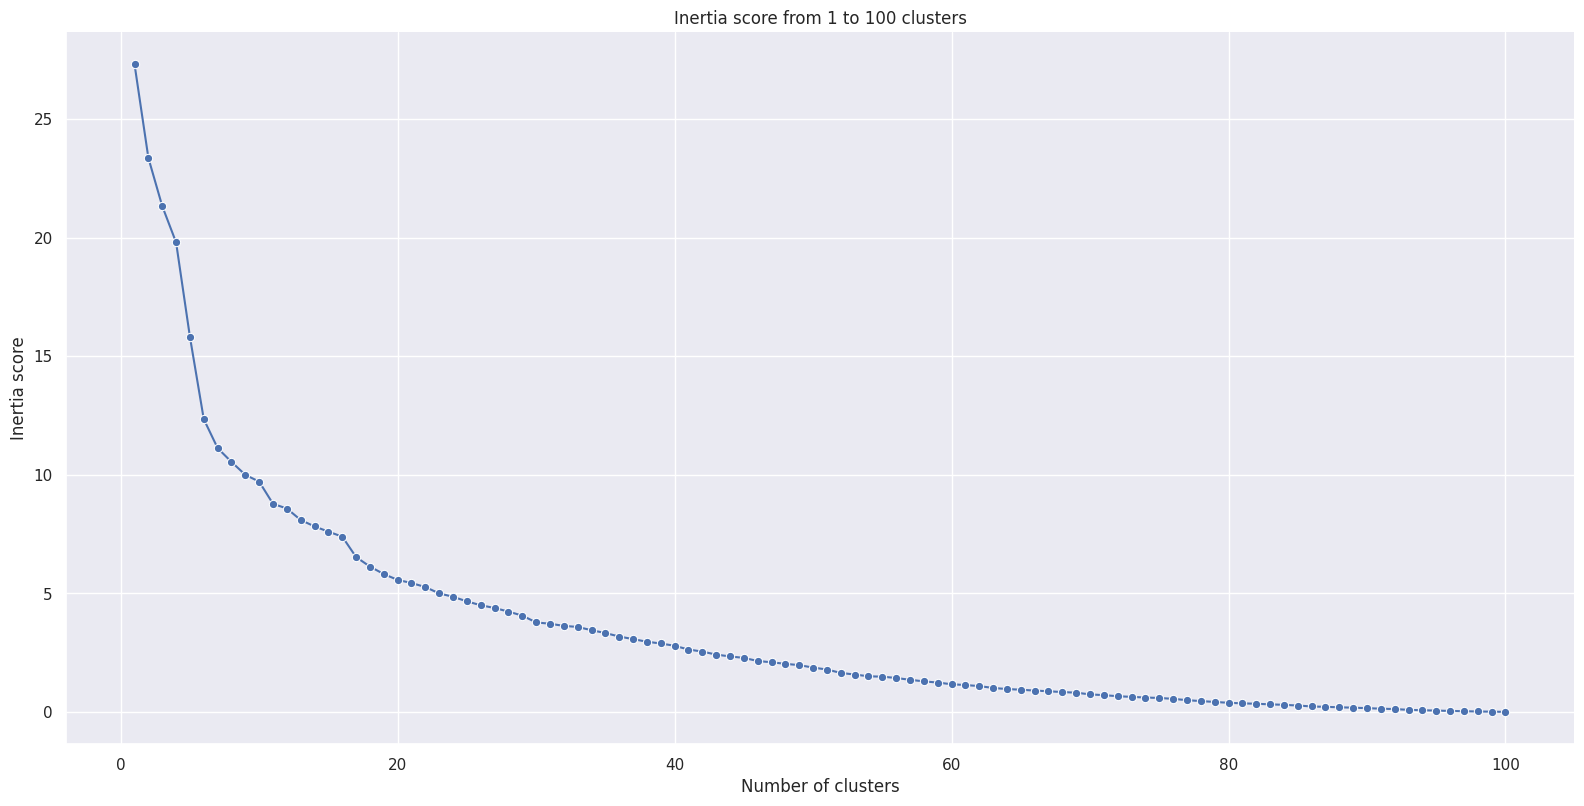

In [ ]:
# # Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(1, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

In [ ]:
cluster_20_inicial

danceability  \
name                                               artist_x                                                         
Rosa Morena                                    ... Kurt Elling                                           0.673216   
                                                   Kurt Elling                                           0.543950   
The Girl From Ipanema                          ... Stan Getz                                             0.662875   
                                                   Stan Getz                                             0.662875   
                                                   Stan Getz                                             0.662875   
...                                                                                                           ...   
It's Only A Paper Moon                         ... Ella Fitzgerald                                       0.786970   
It Never Entered My Mind                       ... Coleman Hawkins                                       0.583247   
Let's Do It                                    ... Eartha Kitt                                           0.675284   
Splanky                                        ... Count Basie                                           0.602896   
Freddie Freeloader (feat. John Coltrane, Cannon... Miles Davis                                           0.650465   

                                                                                                     energy  \
name                                               artist_x                                                   
Rosa Morena                                    ... Kurt Elling                                       0.1190   
                                                   Kurt Elling                                       0.4890   
The Girl From Ipanema                          ... Stan Getz                                         0.1400   
                                                   Stan Getz                                         0.1400   
                                                   Stan Getz                                         0.1400   
...                                                                                                     ...   
It's Only A Paper Moon                         ... Ella Fitzgerald                                   0.1030   
It Never Entered My Mind                       ... Coleman Hawkins                                   0.0970   
Let's Do It                                    ... Eartha Kitt                                       0.0518   
Splanky                                        ... Count Basie                                       0.3760   
Freddie Freeloader (feat. John Coltrane, Cannon... Miles Davis                                       0.2780   

                                                                                                          key  \
name                                               artist_x                                                     
Rosa Morena                                    ... Kurt Elling                                       0.545455   
                                                   Kurt Elling                                       0.000000   
The Girl From Ipanema                          ... Stan Getz                                         0.727273   
                                                   Stan Getz                                         0.727273   
                                                   Stan Getz                                         0.727273   
...                                                                                                       ...   
It's Only A Paper Moon                         ... Ella Fitzgerald                                   0.909091   
It Never Entered My Mind                       ... Coleman Hawkins                                   0.454545   
Let's

In [ ]:
#########Import model for multiple using MInMax Scalers
# numbers of clusters 40
# Data Frame already scaled "Multiplesongs_minmax"
# 1. import the model
from sklearn.cluster import KMeans

# 2. Initialise the model
random_seed = 123

my_kmeans_music_MinMax1 = KMeans(n_clusters = 5, # we'll explore how to choose the number of clusters in a later notebook
                      random_state = random_seed)

# 3. fit the model to the data
my_kmeans_music_MinMax1.fit(cluster_20_inicial)

############################
# 4. Obtain the cluster output

clusters = my_kmeans_music_MinMax1.labels_

# 5. Attach the cluster output to our original DataFrame
cluster_20_inicial["cluster"] = clusters

cluster_20_inicial.sort_values(by="cluster")
clusteresorted= cluster_20_inicial.sort_values(by="cluster")
clusteresorted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



danceability  \
name                                               artist_x                                                         
Rosa Morena                                    ... Kurt Elling                                           0.673216   
I Walk the Line                                ... Johnny Cash                                           0.737332   
It Doesn't Matter Anymore                      ... Buddy Holly                                           0.687694   
Blue Moon                                      ... Billie Holiday                                        0.660807   
                                                   Billie Holiday                                        0.660807   
...                                                                                                           ...   
Always On My Mind                              ... Elvis Presley                                         0.370217   
Just the Way You Are                           ... Billy Joel                                            0.510858   
Someone Like You                               ... Adele                                                 0.542916   
All of Me                                      ... John Legend                                           0.518097   
I Will Always Love You                         ... Dolly Parton                                          0.433299   

                                                                                                     energy  \
name                                               artist_x                                                   
Rosa Morena                                    ... Kurt Elling                                       0.1190   
I Walk the Line                                ... Johnny Cash                                       0.2580   
It Doesn't Matter Anymore                      ... Buddy Holly                                       0.1790   
Blue Moon                                      ... Billie Holiday                                    0.2690   
                                                   Billie Holiday                                    0.2690   
...                                                                                                     ...   
Always On My Mind                              ... Elvis Presley                                     0.3870   
Just the Way You Are                           ... Billy Joel                                        0.0407   
Someone Like You                               ... Adele                                             0.1120   
All of Me                                      ... John Legend                                       0.0775   
I Will Always Love You                         ... Dolly Parton                                      0.0121   

                                                                                                          key  \
name                                               artist_x                                                     
Rosa Morena                                    ... Kurt Elling                                       0.545455   
I Walk the Line                                ... Johnny Cash                                       0.818182   
It Doesn't Matter Anymore                      ... Buddy Holly                                       0.636364   
Blue Moon                                      ... Billie Holiday                                    0.727273   
                                                   Billie Holiday                                    0.727273   
...                                                                                                       ...   
Always On My Mind                              ... Elvis Presley                                     0.636364   
Just the Way You Are                           ... Billy Joel                                        0.909091   
Someo

In [ ]:
cluster_20

danceability  \
name                                               artist_x                                                         
Rosa Morena                                    ... Kurt Elling                                           0.673216   
                                                   Kurt Elling                                           0.543950   
The Girl From Ipanema                          ... Stan Getz                                             0.662875   
                                                   Stan Getz                                             0.662875   
                                                   Stan Getz                                             0.662875   
...                                                                                                           ...   
It's Only A Paper Moon                         ... Ella Fitzgerald                                       0.786970   
It Never Entered My Mind                       ... Coleman Hawkins                                       0.583247   
Let's Do It                                    ... Eartha Kitt                                           0.675284   
Splanky                                        ... Count Basie                                           0.602896   
Freddie Freeloader (feat. John Coltrane, Cannon... Miles Davis                                           0.650465   

                                                                                                     energy  \
name                                               artist_x                                                   
Rosa Morena                                    ... Kurt Elling                                       0.1190   
                                                   Kurt Elling                                       0.4890   
The Girl From Ipanema                          ... Stan Getz                                         0.1400   
                                                   Stan Getz                                         0.1400   
                                                   Stan Getz                                         0.1400   
...                                                                                                     ...   
It's Only A Paper Moon                         ... Ella Fitzgerald                                   0.1030   
It Never Entered My Mind                       ... Coleman Hawkins                                   0.0970   
Let's Do It                                    ... Eartha Kitt                                       0.0518   
Splanky                                        ... Count Basie                                       0.3760   
Freddie Freeloader (feat. John Coltrane, Cannon... Miles Davis                                       0.2780   

                                                                                                          key  \
name                                               artist_x                                                     
Rosa Morena                                    ... Kurt Elling                                       0.545455   
                                                   Kurt Elling                                       0.000000   
The Girl From Ipanema                          ... Stan Getz                                         0.727273   
                                                   Stan Getz                                         0.727273   
                                                   Stan Getz                                         0.727273   
...                                                                                                       ...   
It's Only A Paper Moon                         ... Ella Fitzgerald                                   0.909091   
It Never Entered My Mind                       ... Coleman Hawkins                                   0.454545   
Let's

In [ ]:
cluster_20

danceability  \
name                                               artist_x                                                         
Rosa Morena                                    ... Kurt Elling                                           0.673216   
                                                   Kurt Elling                                           0.543950   
The Girl From Ipanema                          ... Stan Getz                                             0.662875   
                                                   Stan Getz                                             0.662875   
                                                   Stan Getz                                             0.662875   
...                                                                                                           ...   
It's Only A Paper Moon                         ... Ella Fitzgerald                                       0.786970   
It Never Entered My Mind                       ... Coleman Hawkins                                       0.583247   
Let's Do It                                    ... Eartha Kitt                                           0.675284   
Splanky                                        ... Count Basie                                           0.602896   
Freddie Freeloader (feat. John Coltrane, Cannon... Miles Davis                                           0.650465   

                                                                                                     energy  \
name                                               artist_x                                                   
Rosa Morena                                    ... Kurt Elling                                       0.1190   
                                                   Kurt Elling                                       0.4890   
The Girl From Ipanema                          ... Stan Getz                                         0.1400   
                                                   Stan Getz                                         0.1400   
                                                   Stan Getz                                         0.1400   
...                                                                                                     ...   
It's Only A Paper Moon                         ... Ella Fitzgerald                                   0.1030   
It Never Entered My Mind                       ... Coleman Hawkins                                   0.0970   
Let's Do It                                    ... Eartha Kitt                                       0.0518   
Splanky                                        ... Count Basie                                       0.3760   
Freddie Freeloader (feat. John Coltrane, Cannon... Miles Davis                                       0.2780   

                                                                                                          key  \
name                                               artist_x                                                     
Rosa Morena                                    ... Kurt Elling                                       0.545455   
                                                   Kurt Elling                                       0.000000   
The Girl From Ipanema                          ... Stan Getz                                         0.727273   
                                                   Stan Getz                                         0.727273   
                                                   Stan Getz                                         0.727273   
...                                                                                                       ...   
It's Only A Paper Moon                         ... Ella Fitzgerald                                   0.909091   
It Never Entered My Mind                       ... Coleman Hawkins                                   0.454545   
Let's

In [ ]:
cluster_20

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
name,artist_x,,,,,,,,,,,,,,
Não Sei,Sílvia Pérez Cruz,0.395036,0.0866,0.090909,0.748802,0.0,0.043137,0.981928,0.002000,0.237082,0.159391,0.518912,0.066134,0.6,2
Guarda-me A Vida Na Mão,Ana Moura,0.498449,0.1360,0.545455,0.719833,0.0,0.034641,0.949799,0.000774,0.105370,0.263959,0.633553,0.054334,0.8,1
Bonatology,Richard Bona,0.344364,0.0462,0.727273,0.621939,0.0,0.071569,0.987952,0.000000,0.134752,0.434518,0.420795,0.018313,0.8,1
Black Mountain,Isobel Campbell,0.321613,0.2280,0.181818,0.711160,0.0,0.040959,0.913655,0.051878,0.107396,0.230457,0.332455,0.041107,0.8,2
Shake It Off,Taylor Swift,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.049230,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bauch und Kopf,Mark Forster,0.483971,0.4430,0.090909,0.822340,0.0,0.107843,0.689759,0.000026,0.329281,0.314721,0.529151,0.054722,1.0,4
Amorfoda,Bad Bunny,0.774560,0.4180,0.818182,0.848929,0.0,0.063943,0.988956,0.000128,0.084296,0.311675,0.691093,0.032019,0.6,1
I Need You Now,Smokie Norful,0.350569,0.2730,0.454545,0.815999,0.0,0.033660,0.731928,0.000000,0.154002,0.308629,0.452376,0.057813,0.6,4


In [ ]:
cluster_0_data = cluster_20[cluster_20['cluster'] == 3]
cluster_0_data

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
name,artist_x,,,,,,,,,,,,,,
La Leyenda Del Pájaro Antiguo (feat. Nacho Vegas),Carlos Madrid,0.434333,0.357,0.818182,0.831486,1.0,0.035076,0.828313,0.000001,0.086829,0.244670,0.544801,0.047196,0.8,3
Free,Angel Olsen,0.495346,0.281,0.818182,0.806593,1.0,0.029630,0.672691,0.000041,0.157042,0.390863,0.512234,0.030790,0.8,3
La Vall Del Cel,Germà Aire,0.517063,0.430,0.727273,0.733885,1.0,0.034096,0.678715,0.002660,0.171226,0.322843,0.503094,0.028659,0.8,3
Twilight Time,The Platters,0.421923,0.366,0.818182,0.808027,1.0,0.032244,0.872490,0.000000,0.270517,0.298477,0.363152,0.034798,0.8,3
The Great Pretender,The Platters,0.439504,0.401,0.636364,0.824443,1.0,0.034314,0.946787,0.000003,0.072948,0.539086,0.540726,0.033811,0.6,3
It's Only Make Believe - Single Version,Conway Twitty,0.560496,0.531,1.000000,0.868932,1.0,0.041830,0.890562,0.001117,0.128673,0.349239,0.588897,0.026261,0.8,3
On The Street Where You Live,Vic Damone,0.300931,0.312,0.909091,0.810391,1.0,0.039542,0.874498,0.000000,0.143870,0.204061,0.537768,0.033287,1.0,3
My Prayer,The Platters,0.371251,0.272,0.909091,0.841300,1.0,0.032026,0.815261,0.000000,0.096251,0.257868,0.510533,0.035696,0.6,3
To Love Somebody,Bee Gees,0.437435,0.384,0.818182,0.774298,1.0,0.034314,0.731928,0.000004,0.273556,0.528934,0.422590,0.039450,0.8,3


In [ ]:
song_clustered20_means=cluster_20.groupby("cluster" ).agg({"loudness":'mean', "speechiness":'mean',"acousticness":'mean', "instrumentalness":'mean',
                                                                  "liveness":'mean', "valence":'mean', "danceability":'mean',"energy":'mean' })
song_clustered20_means

,loudness,speechiness,acousticness,instrumentalness,liveness,valence,danceability,energy
cluster,,,,,,,,
0,0.738145,0.054651,0.861323,0.046021,0.175037,0.484823,0.626174,0.217559
1,0.757231,0.037364,0.888345,0.014198,0.154378,0.257149,0.382239,0.214638
2,0.757161,0.042429,0.737701,0.025011,0.198582,0.414213,0.473371,0.269850
3,0.813800,0.034997,0.692053,0.002639,0.132741,0.340648,0.484568,0.403692
4,0.660041,0.053867,0.994227,0.953299,0.096935,0.177843,0.501293,0.060575


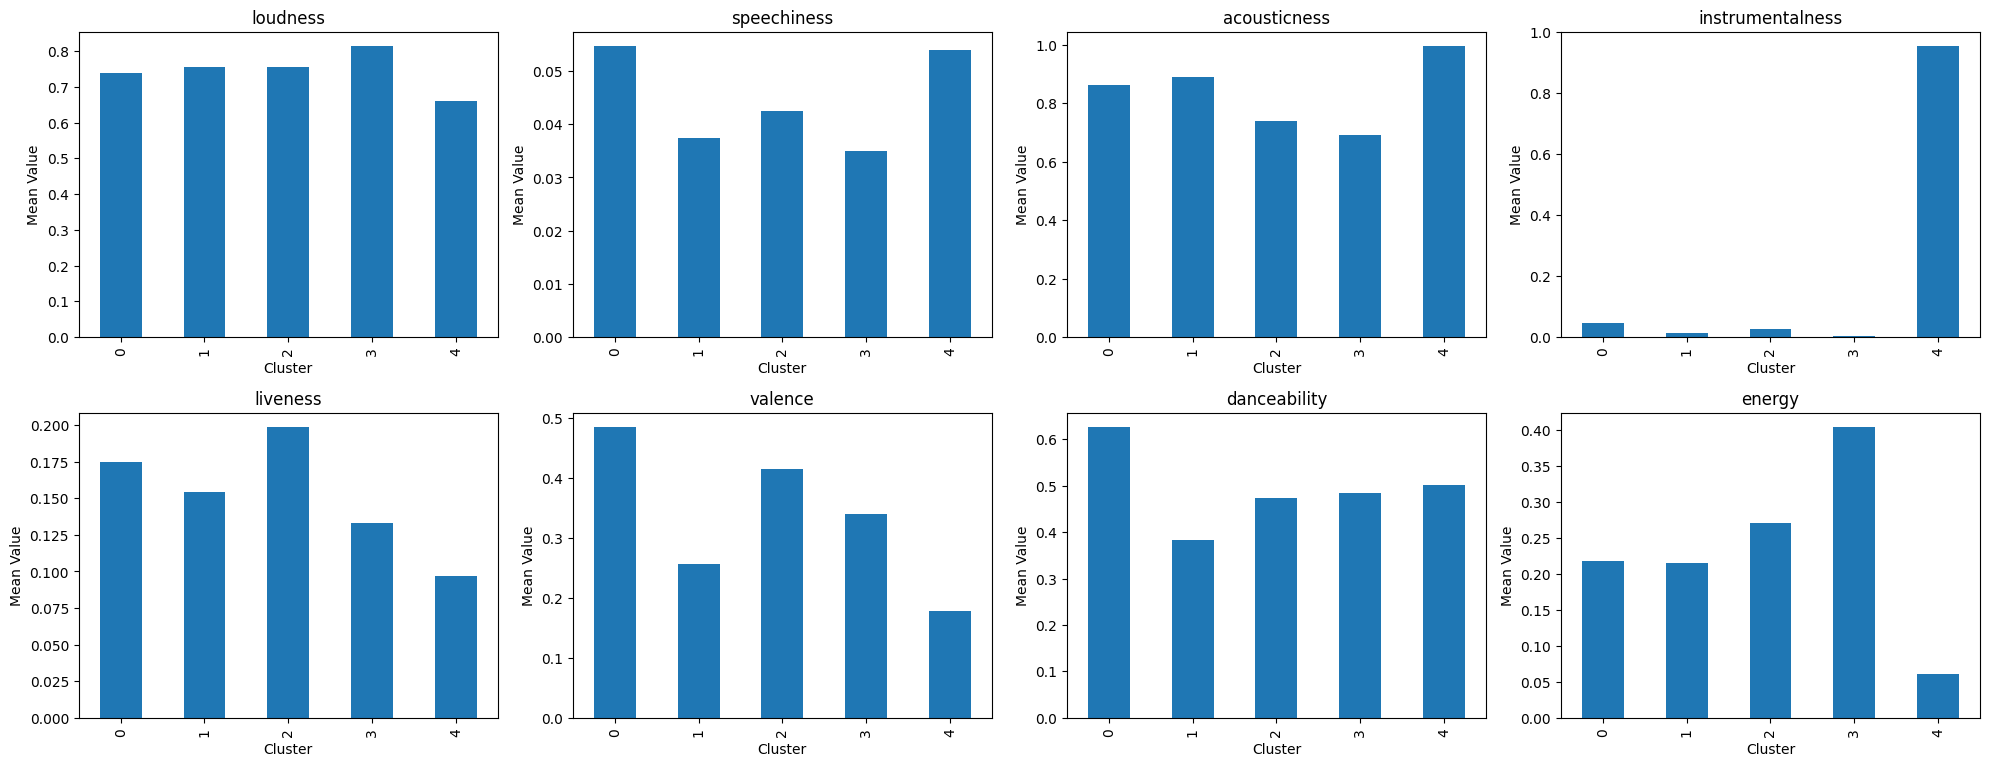

In [ ]:
import matplotlib.pyplot as plt

features = song_clustered20_means.columns
clusters = song_clustered20_means.index

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    song_clustered20_means[feature].plot(kind='bar', ax=ax)
    ax.set_title(feature)
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Mean Value')

# Remove empty subplots if there are any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
cluster_20_1=cluster_20.groupby('cluster').mean()

In [ ]:
heatmap20 = cluster_20.set_index("cluster")
heatmap20

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
cluster,,,,,,,,,,,,,
0,0.673216,0.1190,0.545455,0.655228,1.0,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,0.063684,0.8
2,0.543950,0.4890,0.000000,0.789753,0.0,0.038562,0.206827,0.000000,0.106383,0.727919,0.448596,0.028002,0.8
0,0.662875,0.1400,0.727273,0.704411,1.0,0.042484,0.870482,0.001685,0.106383,0.393909,0.604318,0.075397,0.8
0,0.662875,0.1400,0.727273,0.704411,1.0,0.042484,0.870482,0.001685,0.106383,0.393909,0.604318,0.075397,0.8
0,0.662875,0.1400,0.727273,0.704411,1.0,0.042484,0.870482,0.001685,0.106383,0.393909,0.604318,0.075397,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.786970,0.1030,0.909091,0.701575,1.0,0.045316,0.947791,0.000000,0.128673,0.538071,0.532941,0.033670,0.8
0,0.583247,0.0970,0.454545,0.710084,1.0,0.041394,0.961847,0.059695,0.120567,0.398985,0.619903,0.083045,0.8
0,0.675284,0.0518,0.727273,0.658700,1.0,0.039107,0.877510,0.000002,0.245187,0.432487,0.451381,0.040366,0.8


In [ ]:
cluster_20_1=cluster_20.groupby('cluster').mean()
cluster_20_1

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
cluster,,,,,,,,,,,,,
0,0.626174,0.217559,0.747681,0.738145,1.0,0.054651,0.861323,0.046021,0.175037,0.484823,0.543053,0.051239,0.804082
1,0.382239,0.214638,0.590909,0.757231,1.0,0.037364,0.888345,0.014198,0.154378,0.257149,0.467508,0.043286,0.691667
2,0.473371,0.269850,0.090909,0.757161,0.0,0.042429,0.737701,0.025011,0.198582,0.414213,0.429451,0.033828,0.650000
3,0.484568,0.403692,0.720280,0.813800,1.0,0.034997,0.692053,0.002639,0.132741,0.340648,0.535292,0.050696,0.769231
4,0.501293,0.060575,0.818182,0.660041,1.0,0.053867,0.994227,0.953299,0.096935,0.177843,0.582510,0.043622,0.800000


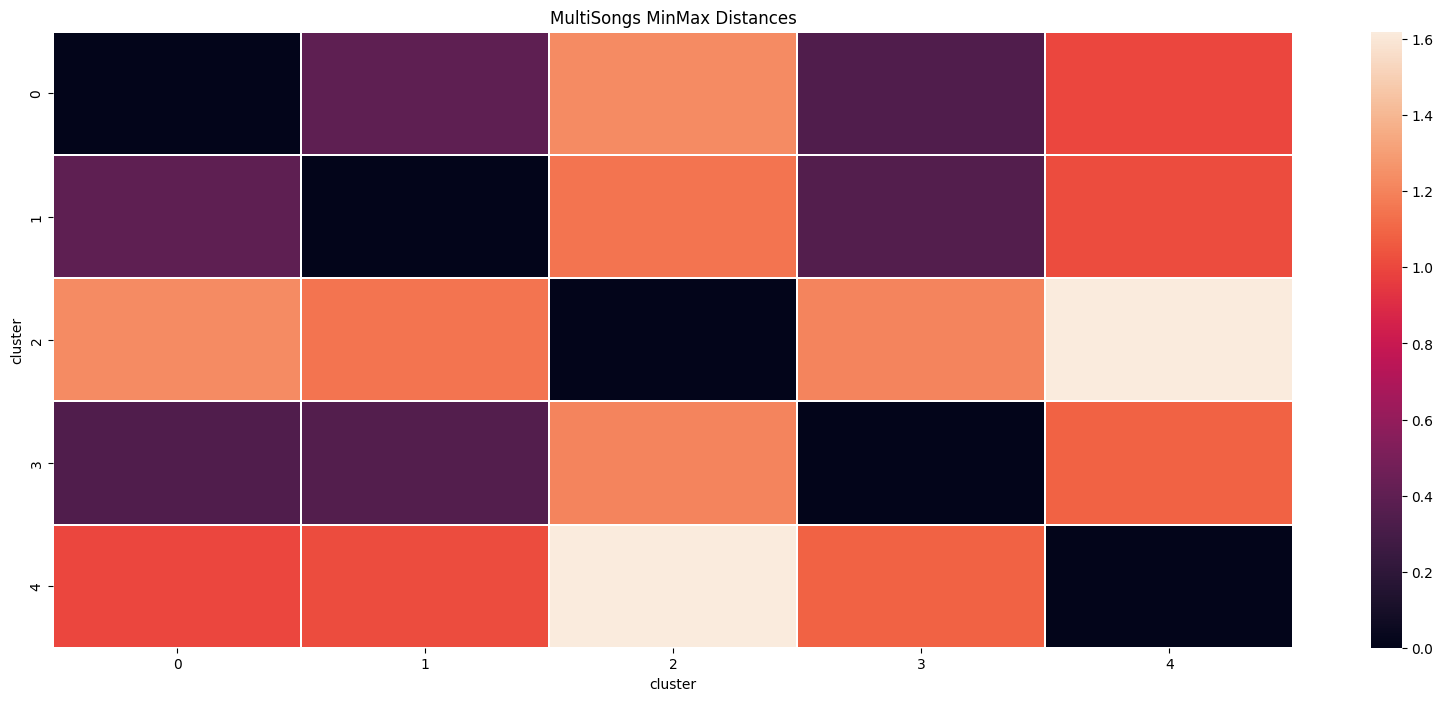

In [ ]:
# Compute the pairwise distance matrices
minmax_distances = pd.DataFrame(pairwise_distances(cluster_20_1),
                                index=cluster_20_1.index,
                                columns=cluster_20_1.index)

# Stating that we want two plots
fig, (ax1) = plt.subplots(1, figsize=(20, 8))

# Plotting the two plots
sns.heatmap(minmax_distances, ax=ax1, linewidths=.2)

# Adding titles to the plots
ax1.set_title('MultiSongs MinMax Distances')


plt.show()

In [ ]:
song_clustered_means=merged_df3.groupby("cluster" ).agg({"loudness":'mean', "speechiness":'mean',"acousticness":'mean', "instrumentalness":'mean',
                                                                  "liveness":'mean', "valence":'mean', "danceability":'mean',"energy":'mean' })
song_clustered_means

In [ ]:
song_clustered_means

,loudness,speechiness,acousticness,instrumentalness,liveness,valence,danceability,energy
cluster,,,,,,,,
0,0.827716,0.066530,0.510299,0.043421,0.171210,0.674367,0.622351,0.568825
1,0.881894,0.098565,0.149840,0.017505,0.176520,0.675910,0.706429,0.717468
2,0.864945,0.059395,0.297009,0.016836,0.211719,0.321281,0.498997,0.575970
3,0.843484,0.117095,0.004255,0.821089,0.206850,0.212227,0.268742,0.906896
4,0.799389,0.079311,0.644704,0.058272,0.209723,0.590063,0.644754,0.443638
5,0.661726,0.052596,0.909078,0.777836,0.135527,0.206612,0.394455,0.174222
6,0.894591,0.098227,0.057869,0.015411,0.237069,0.495784,0.644789,0.820704
7,0.846212,0.104642,0.018603,0.800295,0.220110,0.223352,0.322302,0.892026
8,0.625624,0.049859,0.897449,0.856417,0.132570,0.179298,0.332927,0.151876


In [ ]:
cluster_20_2=cluster_20_1.reset_index()
cluster_20_3=cluster_20_2.drop(columns=["key","mode", "tempo","duration_ms","time_signature" ])
cluster_20_3

,cluster,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
0,0,0.626174,0.217559,0.738145,0.054651,0.861323,0.046021,0.175037,0.484823
1,1,0.382239,0.214638,0.757231,0.037364,0.888345,0.014198,0.154378,0.257149
2,2,0.473371,0.269850,0.757161,0.042429,0.737701,0.025011,0.198582,0.414213
3,3,0.484568,0.403692,0.813800,0.034997,0.692053,0.002639,0.132741,0.340648
4,4,0.501293,0.060575,0.660041,0.053867,0.994227,0.953299,0.096935,0.177843


In [ ]:
# Define the clusters to plot
clusters_to_plot = [3,4]

# Define the categories
categories = cluster_20_3.columns[1:]

# Create a list to store the Scatterpolar objects
scatter_objects = []


# Iterate over the specified clusters and add an object for each cluster to the list
for cluster in clusters_to_plot:
    # Find the mean value for each column of the cluster
    cluster_data = cluster_20_3[cluster_20_3["cluster"] == cluster]
    cluster_means = [cluster_data[col].values[0] for col in categories]

    # Create a Scatterpolar object for the cluster
    cluster_scatter = go.Scatterpolar(
        r = cluster_means, # set the radial coordinates
        theta = categories, # the names of the columns
        fill = 'toself', # fills in the space with colour
        name = f'Cluster {cluster}' # adds the name of the cluster
    )

    # Add the Scatterpolar object to the list
    scatter_objects.append(cluster_scatter)

# Create the figure (the white area)
fig = go.Figure()

# Add the scatter objects to the figure
fig.add_traces(scatter_objects)

# Add extras to the plot, such as title
fig.update_layout(
  title_text = 'Radar chart of music clusters',
  height = 600,
  width = 800,
  polar = dict(
    radialaxis = dict(
      visible = True, # visibility of the numbers on the arm
      range = [0, 1] # scale of the plot
    )),
  showlegend = True
)

# Show the plot
fig.show()

In [ ]:
# Define the clusters to plot
clusters_to_plot = [3, 4]

# Define the categories
categories = cluster_20_3.columns[1:]

# Create a list to store the Scatterpolar objects
scatter_objects = []

# Define colors for the clusters
colors = {3: 'yellow', 4: 'blue'}

# Define names for the clusters
names = {3: 'Chill Rock', 4: 'Jazz'}

# Iterate over the specified clusters and add an object for each cluster to the list
for cluster in clusters_to_plot:
    # Find the mean value for each column of the cluster
    cluster_data = cluster_20_3[cluster_20_3["cluster"] == cluster]
    cluster_means = [cluster_data[col].values[0] for col in categories]

    # Create a Scatterpolar object for the cluster
    cluster_scatter = go.Scatterpolar(
        r=cluster_means,  # set the radial coordinates
        theta=categories,  # the names of the columns
        fill='toself',  # fills in the space with color
        name=names[cluster],  # adds the name of the cluster
        line=dict(color=colors[cluster])  # set the color for the cluster
    )

    # Add the Scatterpolar object to the list
    scatter_objects.append(cluster_scatter)

# Create the figure (the white area)
fig = go.Figure()

# Add the scatter objects to the figure
fig.add_traces(scatter_objects)

# Add extras to the plot, such as title
fig.update_layout(
    title_text='Radar chart of music clusters',
    height=600,
    width=800,
    polar=dict(
        radialaxis=dict(
            visible=True,  # visibility of the numbers on the arm
            range=[0, 1]  # scale of the plot
        )),
    showlegend=True
)

# Show the plot
fig.show()

In [ ]:
song_clustered_means

NameError: name 'song_clustered_means' is not defined

In [ ]:
from sklearn.metrics import pairwise_distances
import numpy as np

In [ ]:
n_clusters = 54
my_kmeans = KMeans(n_clusters=n_clusters,
                   n_init="auto",
                   random_state = 123)
# Convert DataFrame to NumPy array for fitting the model
X = songs_df[to_scale].values
# Fit the model to the data
my_kmeans.fit(X)
# Obtain the cluster output
clusters = my_kmeans.labels_
# Attach the cluster output to the DataFrame
songs_df["cluster"] = clusters
# Get the coordinates of the cluster centroids
centroids = my_kmeans.cluster_centers_
# Calculate distances between each point and its assigned centroid
distances = pairwise_distances(X, centroids, metric='euclidean')
# Extract the distance of each point to its corresponding centroid
point_to_centroid_distances = distances[np.arange(len(X)), my_kmeans.labels_]
# Add the distances to the DataFrame
songs_df['distance_to_centroid'] = point_to_centroid_distances
# Sort DataFrame by cluster and then by distance to centroid
df_sorted = songs_df.sort_values(by=['cluster', 'distance_to_centroid'])
# Group by cluster and take the first 40 points for each cluster
closest_points = df_sorted.groupby('cluster').head(40)
closest_points